# Part One: Cleaning Data and Preprocessing

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df_agricultural = pd.read_csv('Agricultural_data/consolidado1.csv')

In [3]:
df_agricultural.head()

,date,year month,price_soybean,Brazil-Tmin,Brazil-Tmax,Brazil-T mean,Brazil-Precipitation,ARGENTINA-Tmin,ARGENTINA-Tmax,ARGENTINA T Mean,...,price_wti_oil,price_corn,price_wheat,SOYBEANS - USA PRODUCTION [mTons],SOYBEANS - India PRODUCTION [mTons],SOYBEANS - Brazil PRODUCTION [mTons],SOYBEANS - Argentina PRODUCTION [mTons],SOYBEANS - EU PRODUCTION [mTons],SOYBEANS - China PRODUCTION [mTons],SOYBEANS - USA Stocks [mTons]
0,7/1/1988,07-1988,787.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,42.153,1.547,23.600,9.9,NaN,NaN,8232.0
1,8/1/1988,08-1988,867.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,42.153,1.547,23.600,9.9,NaN,NaN,8232.0
2,9/1/1988,09-1988,813.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,42.153,1.547,23.600,9.9,NaN,NaN,8232.0
3,10/3/1988,10-1988,789.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,42.153,1.547,23.600,9.9,NaN,NaN,37199.0
4,11/1/1988,11-1988,763.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,42.153,1.547,23.600,9.9,NaN,NaN,37199.0


In [4]:
data = df_agricultural.copy()

In [5]:
duplicate_count = len(data) - len(data.drop_duplicates()) 
duplicate_count

0

In [6]:
round(data.isnull().sum().sort_values(ascending=False)/len(data),2)

usa_gdp_pp                                 0.92
eur_gdp_pp                                 0.92
china_gdp_pp                               0.92
SOYBEANS - EU PRODUCTION [mTons]           0.31
SOYBEANS - China PRODUCTION [mTons]        0.31
price_wti_oil                              0.31
meat_price_index                           0.29
world_food_price_index                     0.29
price_wheat                                0.29
price_corn                                 0.29
SP500                                      0.24
price_gold                                 0.14
DXY                                        0.13
VIX                                        0.04
ARGENTINA Precipitation                    0.03
ARGENTINA-Tmax                             0.03
ARGENTINA-Tmin                             0.03
Brazil-Precipitation                       0.03
Brazil-T mean                              0.03
Brazil-Tmax                                0.03
Brazil-Tmin                             

## Preprocessing climate features

In [7]:
data = data.rename(index=str, columns={"Avg Temperature USA Decatur, IL (°C)": "Avg_Temperature_USA", "Precipitation USA Decatur, IL (mm)":'Precipitation_USA'})

In [8]:
data.Avg_Temperature_USA.value_counts(dropna=False)

Avg_Temperature_USA
M        12
22.67     5
24.39     5
24.61     5
23.06     4
         ..
25        1
0.5       1
-4.44     1
-2.17     1
12.33     1
Name: count, Length: 294, dtype: int64

In [9]:
data.Avg_Temperature_USA.replace("M",np.nan, inplace=True)
data.Avg_Temperature_USA.value_counts(dropna=False)

Avg_Temperature_USA
NaN      12
22.67     5
24.39     5
24.61     5
23.06     4
         ..
25        1
0.5       1
-4.44     1
-2.17     1
12.33     1
Name: count, Length: 294, dtype: int64

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # Instanciate a SimpleImputer object with strategy of choice

imputer.fit(data[['Avg_Temperature_USA']]) # Call the "fit" method on the object

data['Avg_Temperature_USA'] = imputer.transform(data[['Avg_Temperature_USA']]) 

In [11]:
data.Precipitation_USA.replace("M",np.nan, inplace=True)
data.Precipitation_USA.value_counts(dropna=False)

Precipitation_USA
NaN        25
32.258      5
65.532      4
77.724      4
58.928      3
           ..
104.394     1
85.344      1
57.15       1
148.336     1
49.022      1
Name: count, Length: 299, dtype: int64

In [12]:
imputer = SimpleImputer(strategy="median") # Instanciate a SimpleImputer object with strategy of choice

imputer.fit(data[['Precipitation_USA']]) # Call the "fit" method on the object

data['Precipitation_USA'] = imputer.transform(data[['Precipitation_USA']]) 

In [ ]:
data.to_csv("Agricultural_data/consolidado2.csv", index=False)

# Part Two: Scaling

## Importing data from the preprocessed consolidated data set

In [16]:
df_final_agricultural = pd.read_csv('Agricultural_data/consolidado_final.csv')

In [17]:
df_final_agricultural.head()

,date,year month,price_soybean,Brazil-Tmin,Brazil-Tmax,Brazil-T mean,Brazil-Precipitation,ARGENTINA-Tmin,ARGENTINA-Tmax,ARGENTINA T Mean,...,price_gold,SP500,VIX,price_wti_oil,price_corn,price_wheat,SOYBEANS - USA PRODUCTION [mTons],SOYBEANS - Brazil PRODUCTION [mTons],SOYBEANS - Argentina PRODUCTION [mTons],SOYBEANS - USA Stocks [mTons]
0,7/1/1988,07-1988,787.50,16.0,26.1,21.05,30,3.0,14.2,8.60,...,436.1,326.2,25.36,14.21,217.25,252.5,42.153,23.600,9.9,"8,232"
1,8/1/1988,08-1988,867.50,17.6,28.8,23.20,34,6.8,17.3,12.05,...,429.3,326.2,25.36,14.21,217.25,252.5,42.153,23.600,9.9,"8,232"
2,9/1/1988,09-1988,813.00,19.6,30.4,25.00,92,5.4,18.1,11.75,...,394.4,326.2,25.36,14.21,217.25,252.5,42.153,23.600,9.9,"8,232"
3,10/3/1988,10-1988,789.25,21.2,30.2,25.70,151,8.7,21.9,15.30,...,412.7,326.2,25.36,14.21,217.25,252.5,42.153,23.600,9.9,"37,199"
4,11/1/1988,11-1988,763.75,21.2,29.2,25.20,173,11.7,27.0,19.35,...,410.0,326.2,25.36,14.21,217.25,252.5,42.153,23.600,9.9,"37,199"


In [20]:
round(df_final_agricultural.isnull().sum().sort_values(ascending=False)/len(data),2)

SOYBEANS - Argentina PRODUCTION [mTons]    0.01
SOYBEANS - Brazil PRODUCTION [mTons]       0.01
SOYBEANS - USA PRODUCTION [mTons]          0.01
ARGENTINA Precipitation                    0.01
SOYBEANS - USA Stocks [mTons]              0.01
meat_price_index                           0.00
world_food_price_index                     0.00
eur_gdp_pp                                 0.00
price_wheat                                0.00
price_corn                                 0.00
price_wti_oil                              0.00
VIX                                        0.00
SP500                                      0.00
price_gold                                 0.00
DXY                                        0.00
usa_gdp_pp                                 0.00
date                                       0.00
year month                                 0.00
exp_infl_1year                             0.00
real_interest_rate                         0.00
Avg Temperature USA Decatur, IL (°C)    

## Rename columns

In [56]:
df_copy_agricultural = df_final_agricultural.copy()

In [57]:
df_copy_agricultural = df_copy_agricultural.rename(index=str, columns={"Avg Temperature USA Decatur, IL (°C)": "USA_Temperature",
                                                                       "Precipitation USA Decatur, IL (mm)":'USA_Precipitation',
                                                                      "SOYBEANS - Argentina PRODUCTION [mTons]":'Argentina_Production',
                                                                      'SOYBEANS - Brazil PRODUCTION [mTons]':'Brazil_Production',
                                                                      'SOYBEANS - USA PRODUCTION [mTons]':'USA_Production',
                                                                      'ARGENTINA Precipitation':'Argentina_Precipitation',
                                                                       'Brazil-Precipitation':'Brazil_Precipitation',
                                                                      'ARGENTINA T Mean':'Argentina_Temperature',
                                                                      'Brazil-T mean':'Brazil_Temperature',
                                                                      'SOYBEANS - USA Stocks [mTons]':'USA_Stocks'})

In [58]:
df_copy_agricultural.drop(columns=['ARGENTINA-Tmax', 'ARGENTINA-Tmin', 'Brazil-Tmax', 'Brazil-Tmin', 'USA_Stocks'], inplace=True)

In [74]:
imputer = SimpleImputer(strategy="median") # Instanciate a SimpleImputer object with strategy of choice
df_copy_agricultural['Argentina_Production'] =  imputer.fit_transform(df_copy_agricultural[['Argentina_Production']])
#df_copy_agricultural['Brazil_Production'] =  imputer.fit_transform(df_copy_agricultural[['Brazil_Production']])
#df_copy_agricultural['USA_Production'] =  imputer.fit_transform(df_copy_agricultural[['USA_Production']])
df_copy_agricultural['Argentina_Precipitation'] =  imputer.fit_transform(df_copy_agricultural[['Argentina_Precipitation']])


In [75]:
df_copy_agricultural['Brazil_Production'].describe()

count           414
unique           35
top         57.000 
freq             12
Name: Brazil_Production, dtype: object

In [78]:
df_copy_agricultural['Brazil_Production'] = pd.to_numeric(df_copy_agricultural['Brazil_Production'], errors='coerce')

In [79]:
df_copy_agricultural['Brazil_Production'].describe()

count    402.000000
mean      65.413134
std       40.283326
min       15.750000
25%       27.300000
50%       57.000000
75%       95.700000
max      156.000000
Name: Brazil_Production, dtype: float64

In [80]:
df_copy_agricultural['USA_Production'] = pd.to_numeric(df_copy_agricultural['USA_Production'], errors='coerce')

In [81]:
imputer = SimpleImputer(strategy="median") 
df_copy_agricultural['Brazil_Production'] =  imputer.fit_transform(df_copy_agricultural[['Brazil_Production']])
df_copy_agricultural['USA_Production'] =  imputer.fit_transform(df_copy_agricultural[['USA_Production']])

In [82]:
round(df_copy_agricultural.isnull().sum().sort_values(ascending=False)/len(data),2)

meat_price_index           0.0
world_food_price_index     0.0
date                       0.0
year month                 0.0
Brazil_Production          0.0
USA_Production             0.0
price_wheat                0.0
price_corn                 0.0
price_wti_oil              0.0
VIX                        0.0
SP500                      0.0
price_gold                 0.0
DXY                        0.0
usa_gdp_pp                 0.0
eur_gdp_pp                 0.0
china_gdp_pp               0.0
exp_infl_1year             0.0
real_interest_rate         0.0
USA_Temperature            0.0
USA_Precipitation          0.0
Argentina_Precipitation    0.0
Argentina_Temperature      0.0
Brazil_Precipitation       0.0
Brazil_Temperature         0.0
price_soybean              0.0
Argentina_Production       0.0
dtype: float64

In [83]:
df_copy_agricultural.head()

,date,year month,price_soybean,Brazil_Temperature,Brazil_Precipitation,Argentina_Temperature,Argentina_Precipitation,USA_Precipitation,USA_Temperature,real_interest_rate,...,DXY,price_gold,SP500,VIX,price_wti_oil,price_corn,price_wheat,USA_Production,Brazil_Production,Argentina_Production
0,7/1/1988,07-1988,787.50,21.05,30,8.60,23.8,51.562,25.39,4.43535,...,97.53,436.1,326.2,25.36,14.21,217.25,252.5,42.153,23.6,9.9
1,8/1/1988,08-1988,867.50,23.20,34,12.05,32.0,58.928,25.67,4.54274,...,97.69,429.3,326.2,25.36,14.21,217.25,252.5,42.153,23.6,9.9
2,9/1/1988,09-1988,813.00,25.00,92,11.75,57.3,77.978,20.33,4.70786,...,97.69,394.4,326.2,25.36,14.21,217.25,252.5,42.153,23.6,9.9
3,10/3/1988,10-1988,789.25,25.70,151,15.30,109.0,52.070,9.28,4.46199,...,93.76,412.7,326.2,25.36,14.21,217.25,252.5,42.153,23.6,9.9
4,11/1/1988,11-1988,763.75,25.20,173,19.35,102.1,149.860,5.89,4.35872,...,90.53,410.0,326.2,25.36,14.21,217.25,252.5,42.153,23.6,9.9


/tmp/ipykernel_20953/1644935230.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


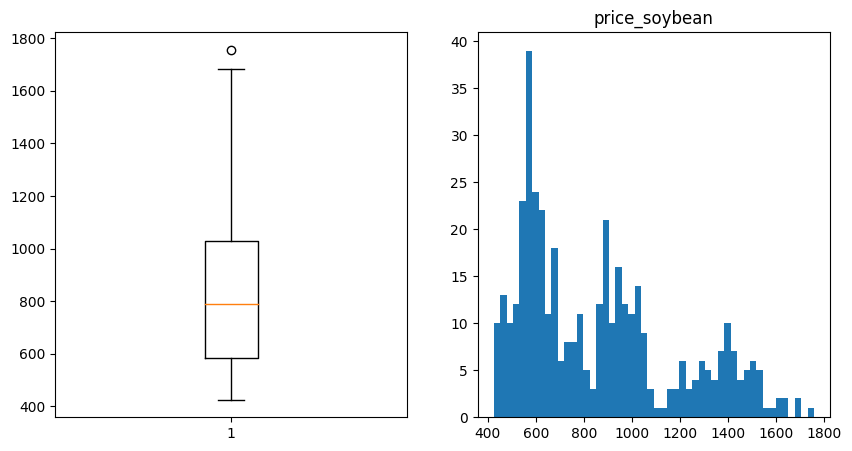

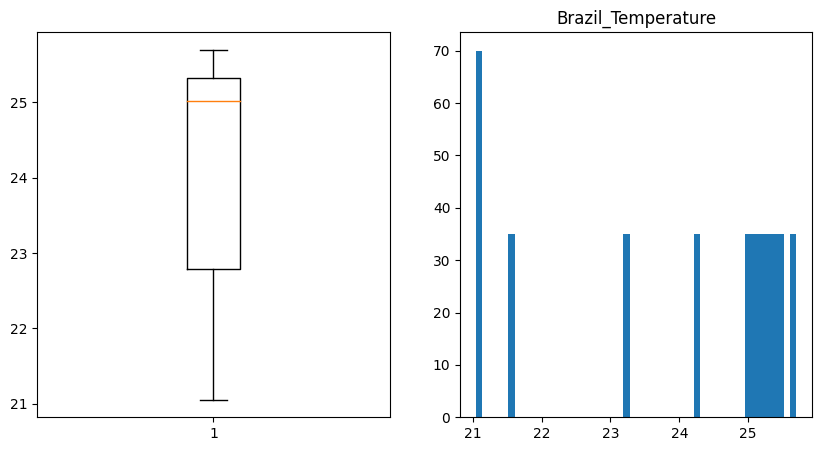

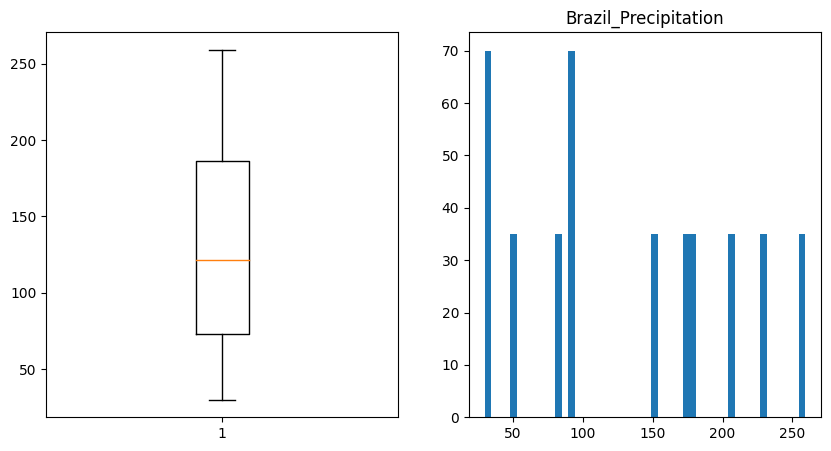

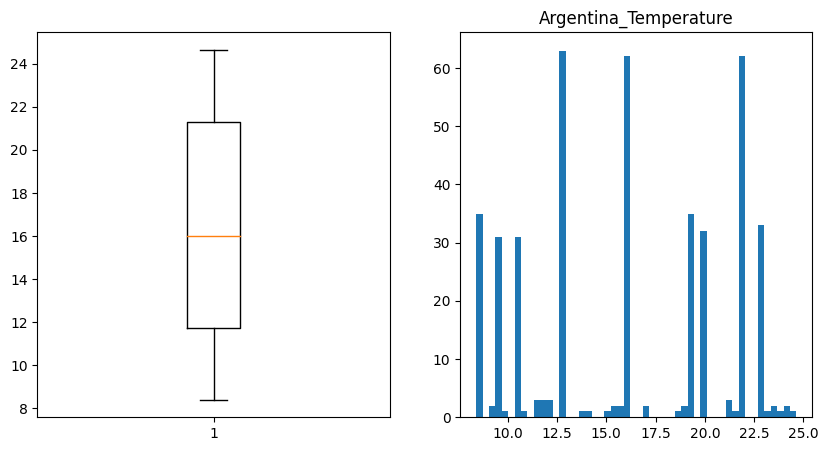

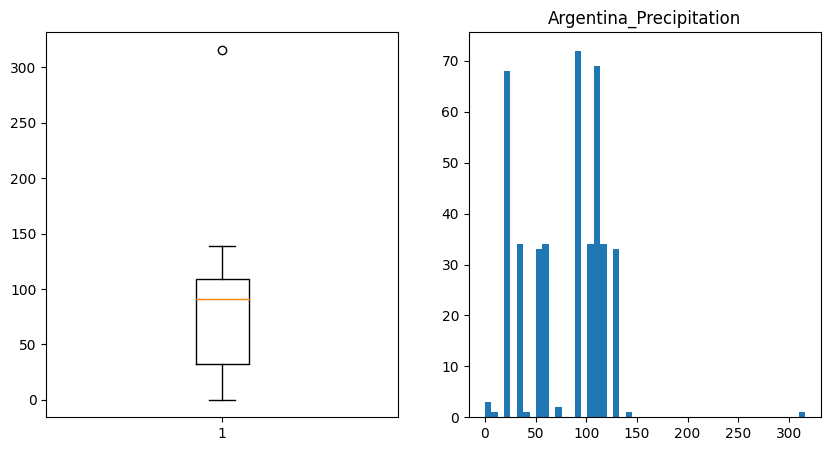

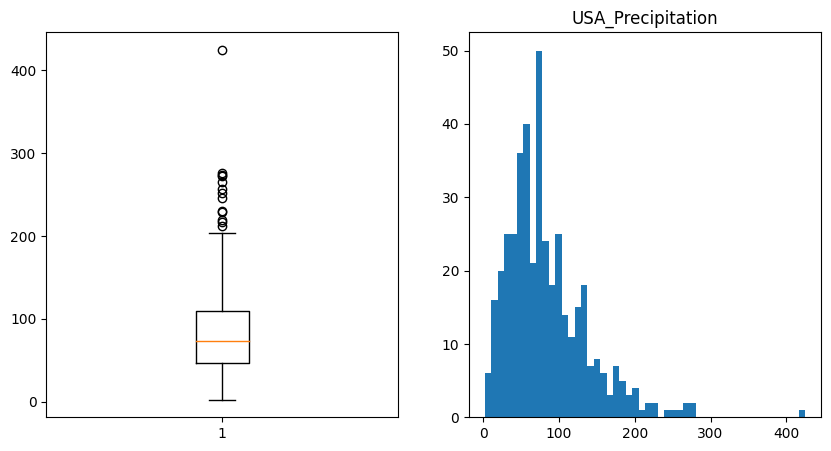

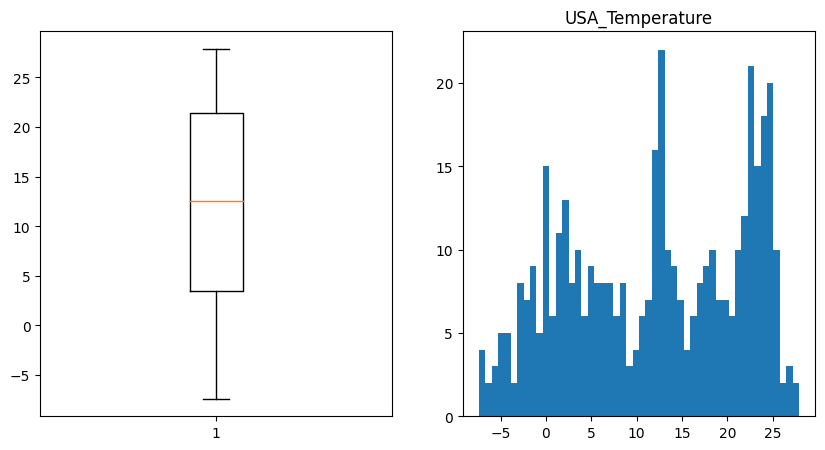

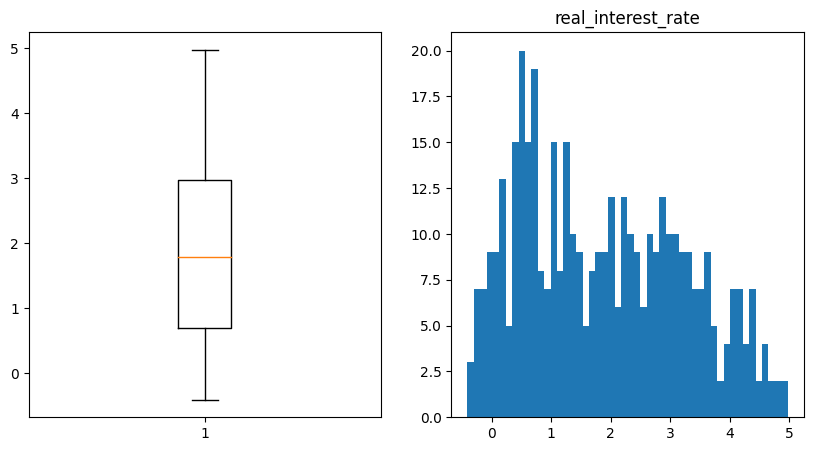

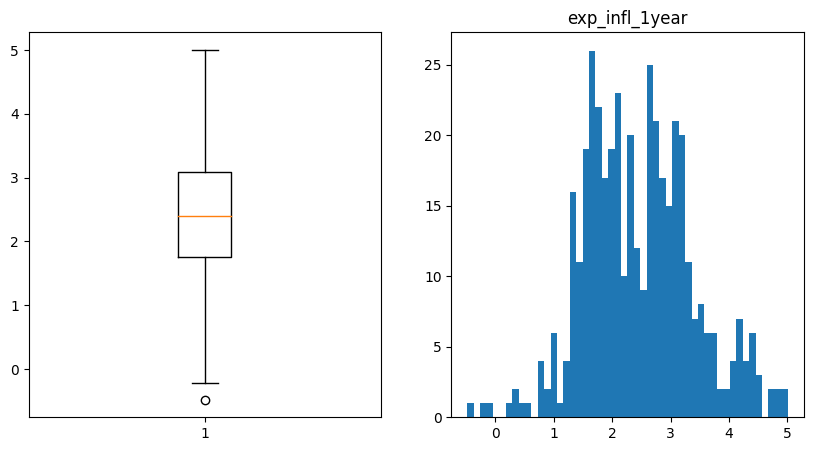

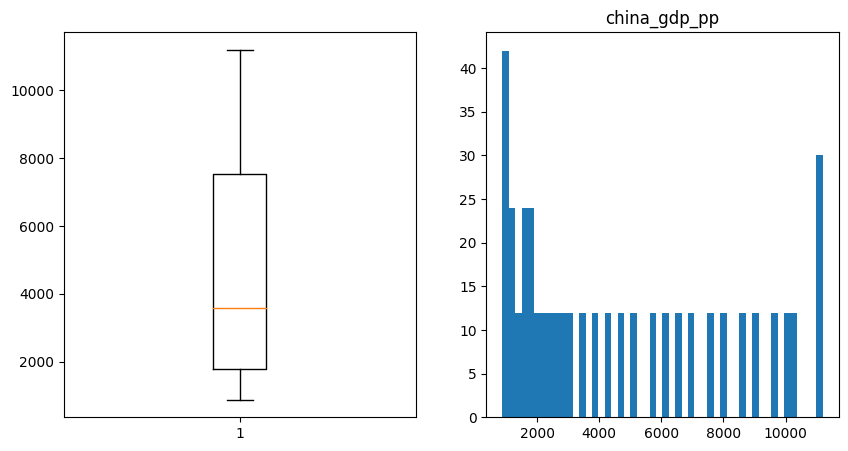

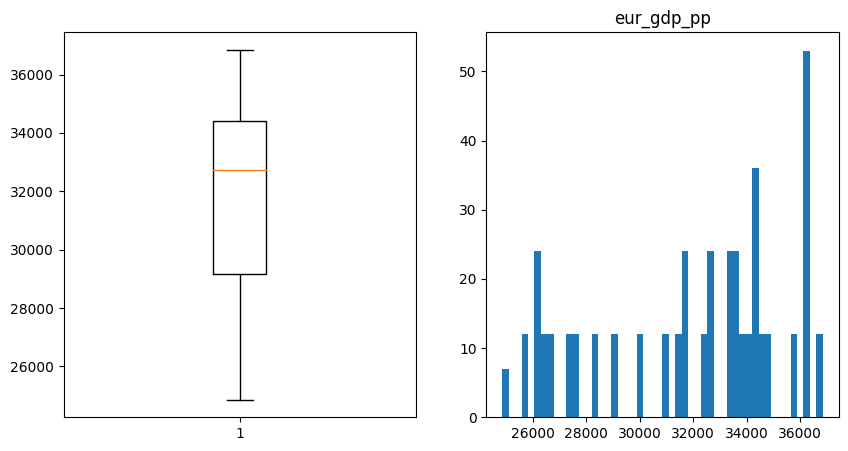

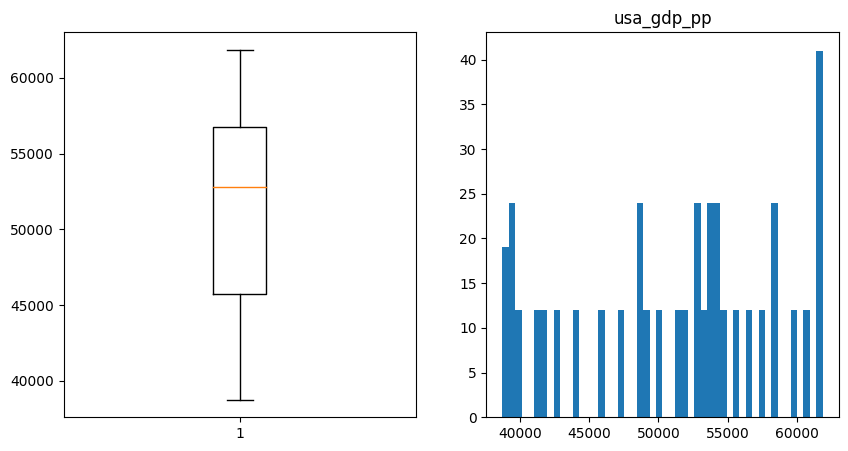

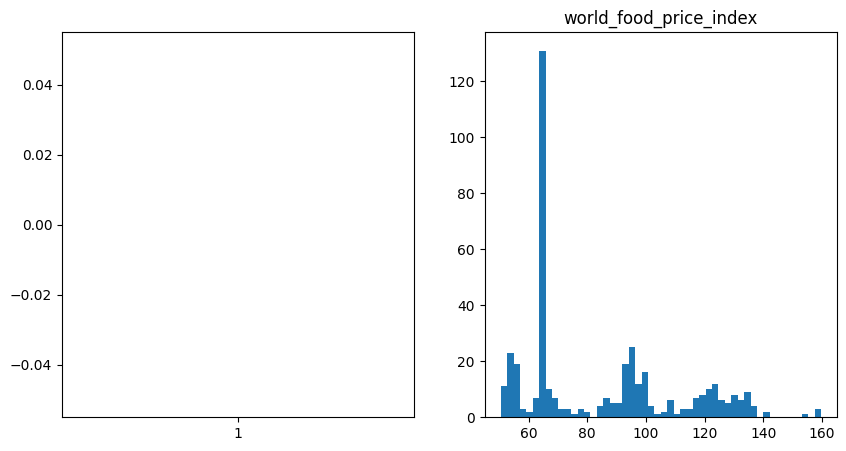

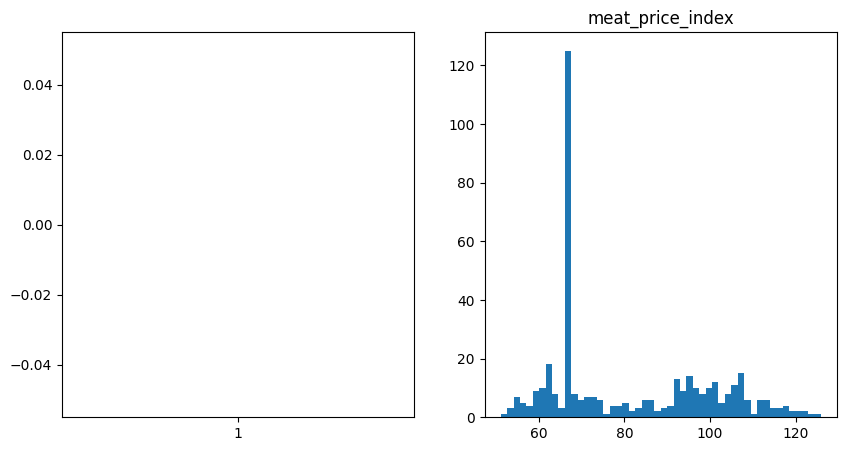

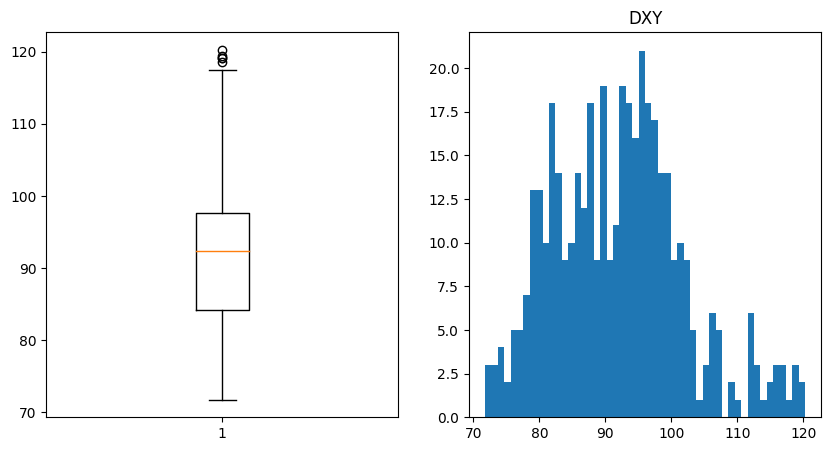

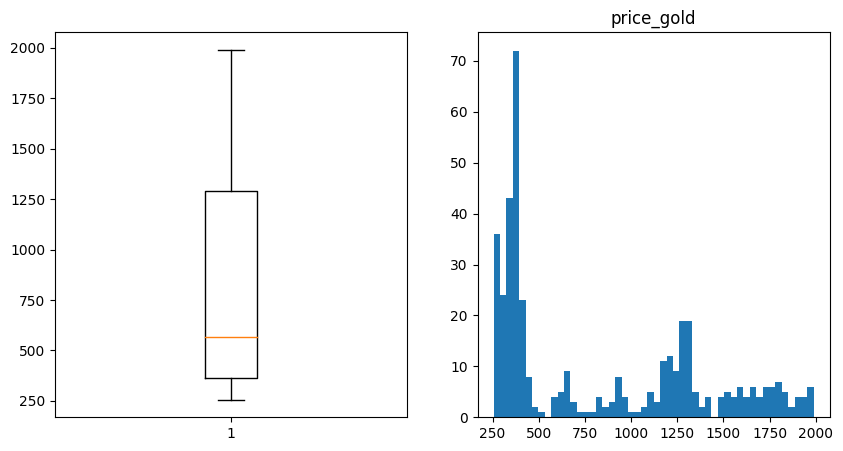

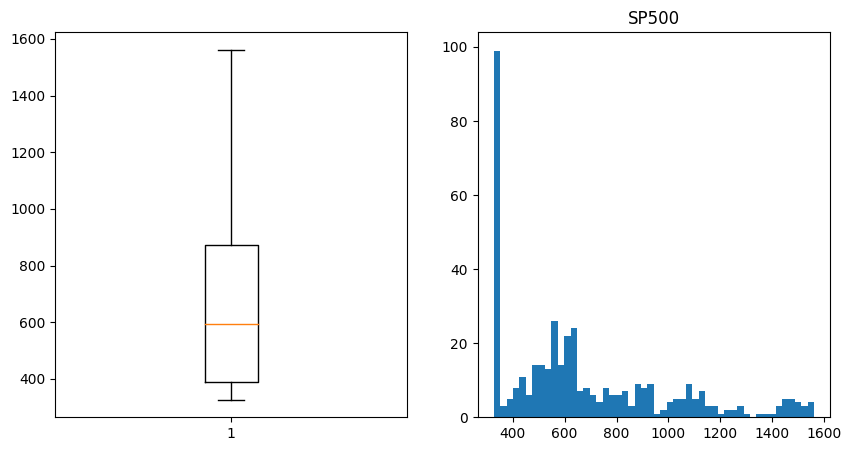

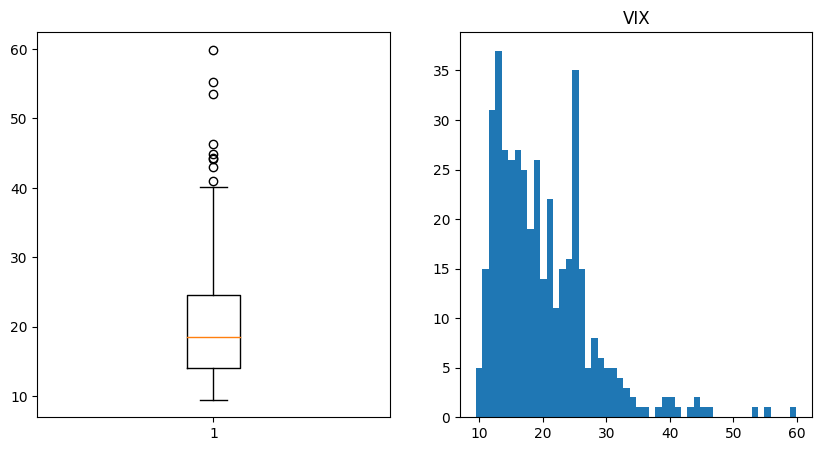

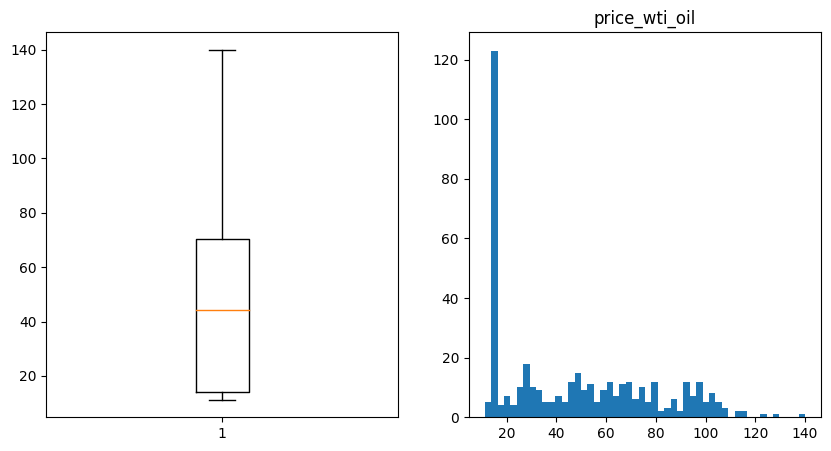

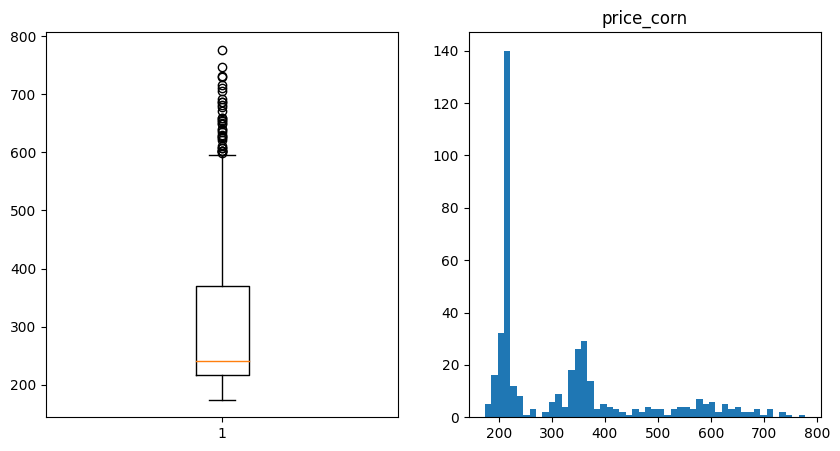

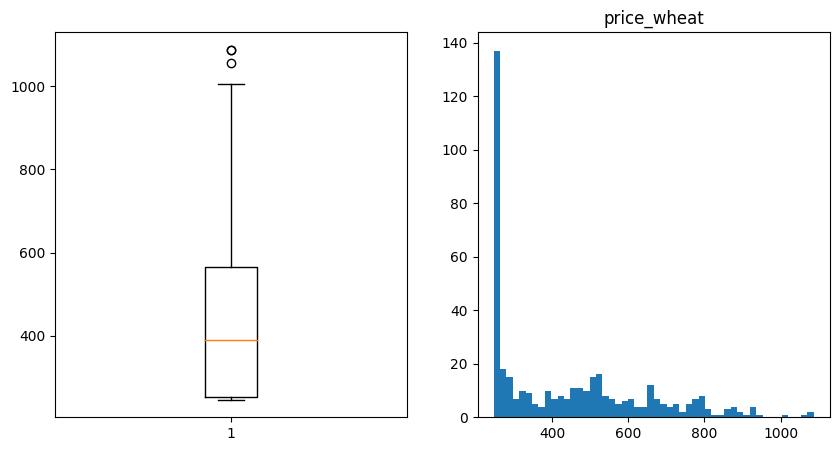

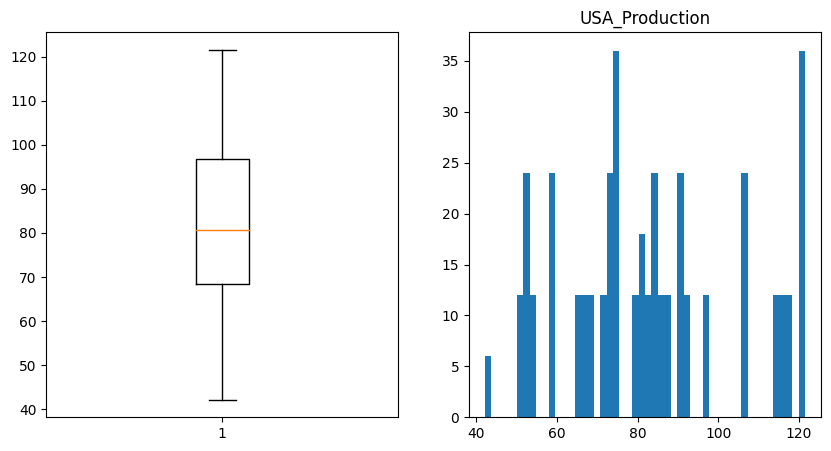

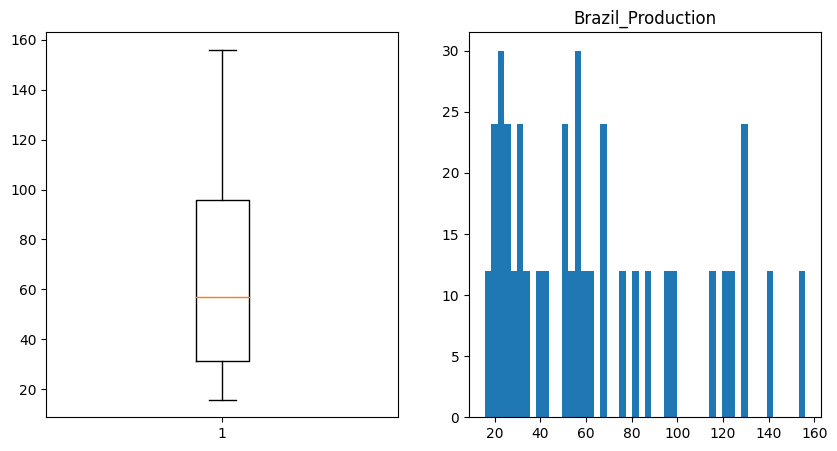

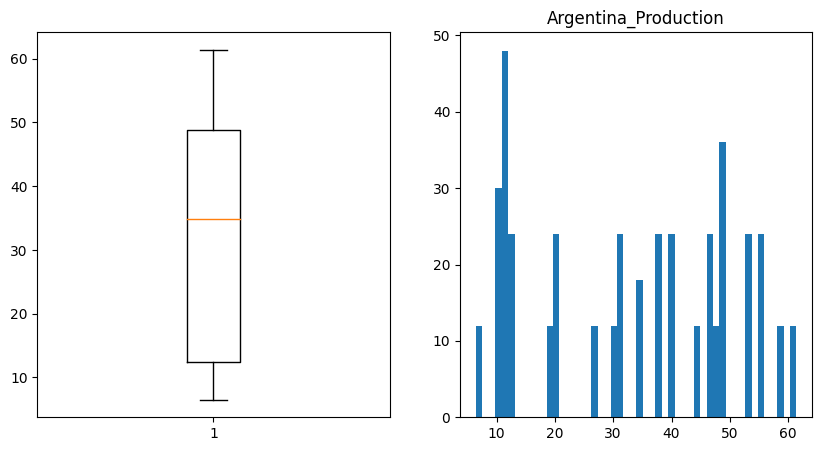

In [89]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

numeric_features=[x for x in df_copy_agricultural.columns if df_copy_agricultural[x].dtype!="object"]
#taking only the numeric columns from the dataframe.

for i in df_copy_agricultural[numeric_features].columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    plt.title(i)
    ax1.boxplot(df_copy_agricultural[i])
    ax2.hist(df_copy_agricultural[i], bins=50)
    #ax3.qqplot(df_final_agricultural[[i]],line='s');


/tmp/ipykernel_20953/4069606587.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,5))


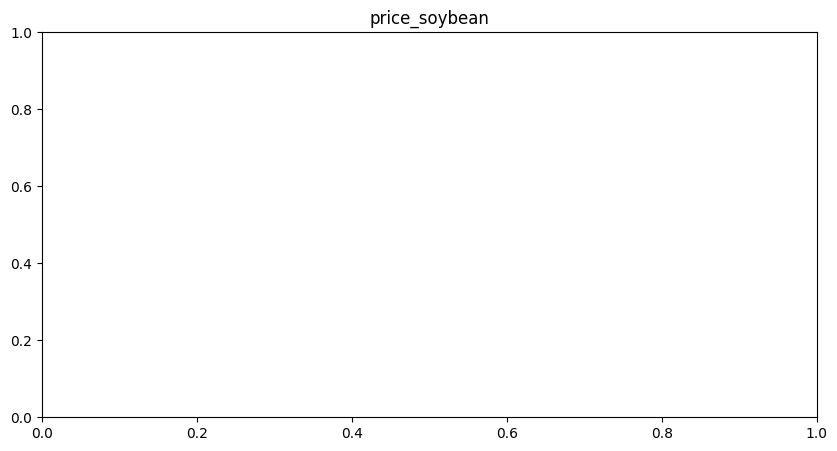

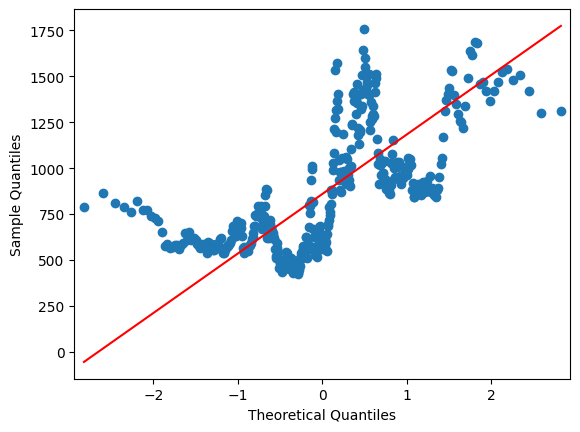

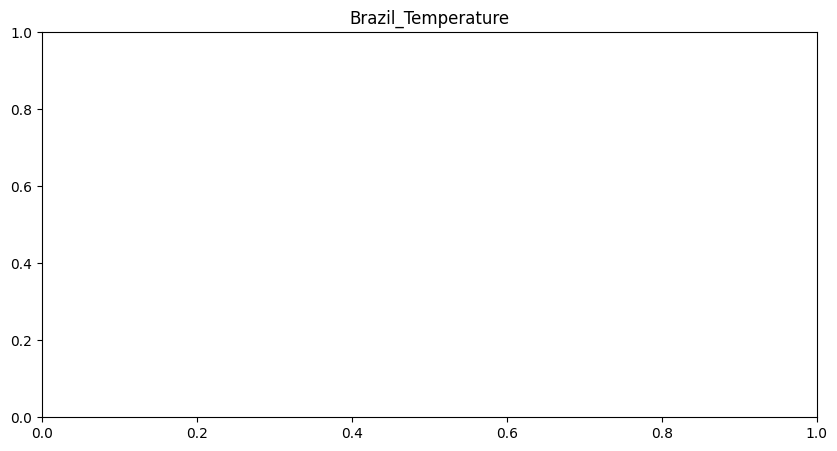

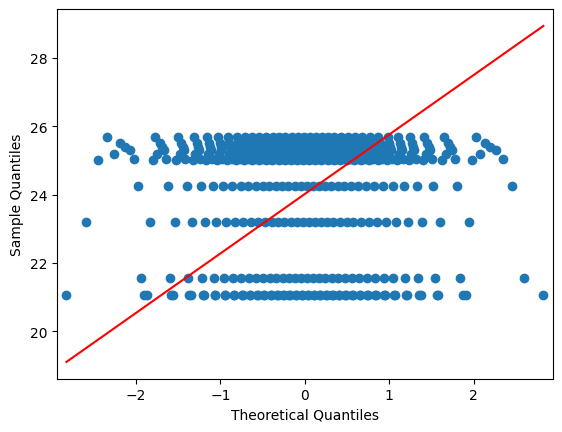

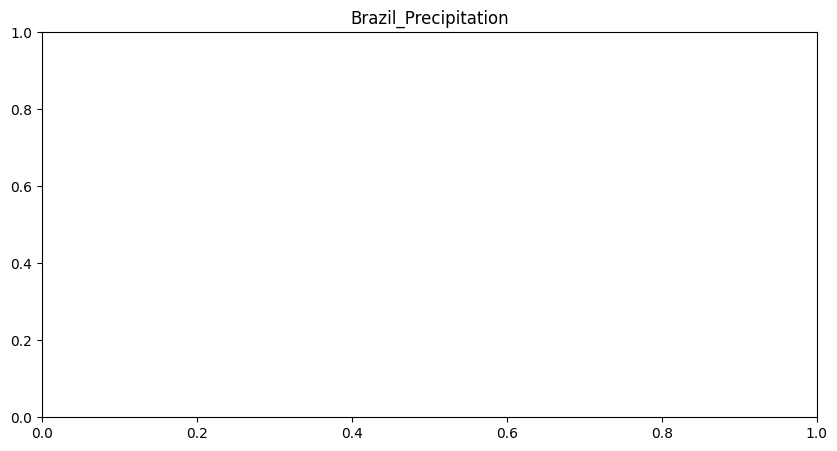

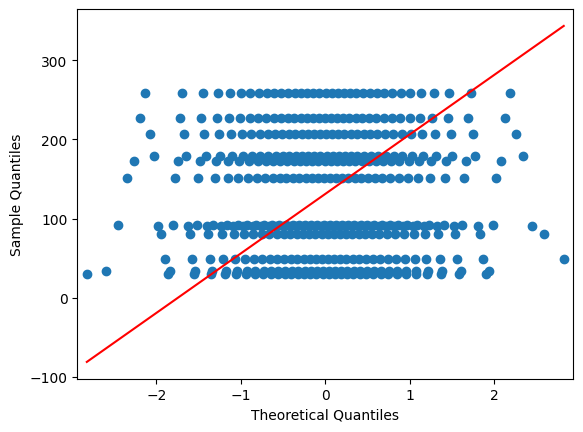

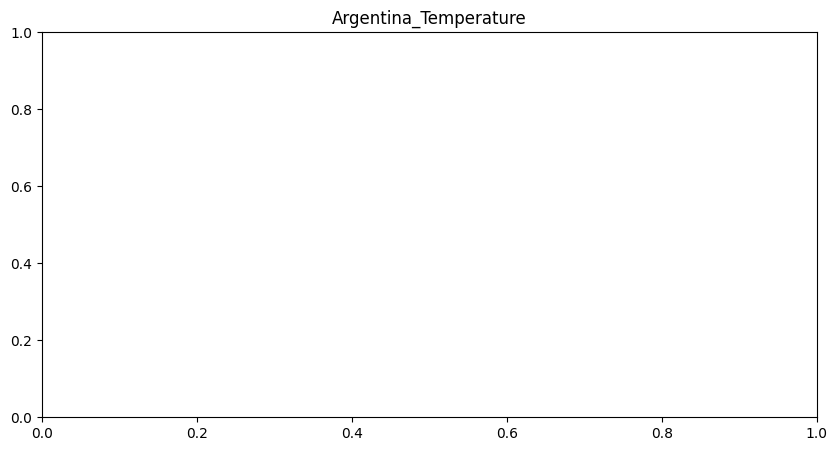

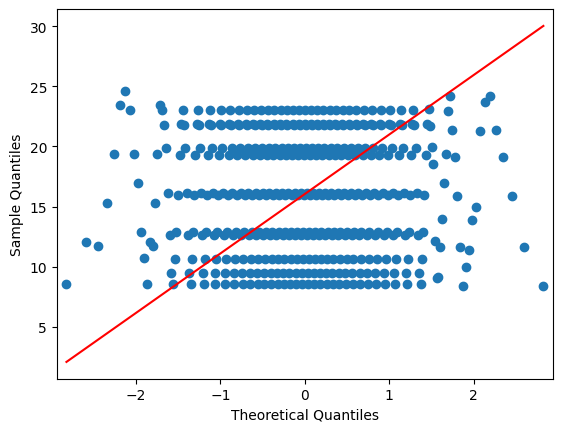

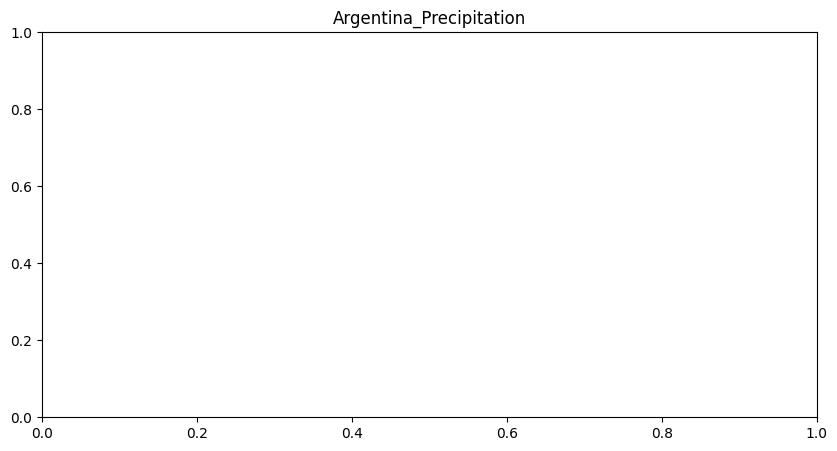

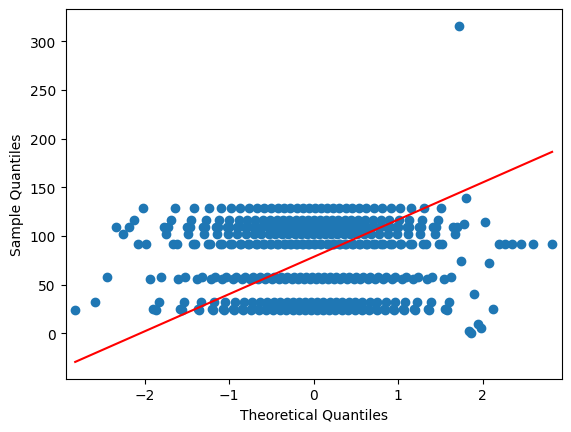

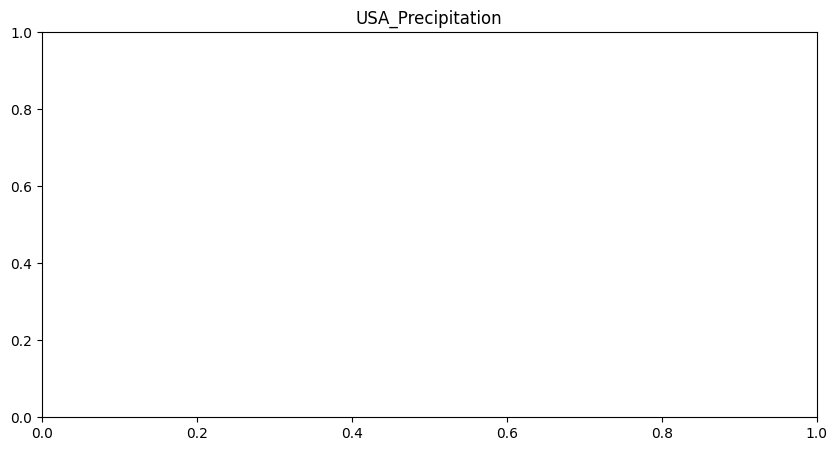

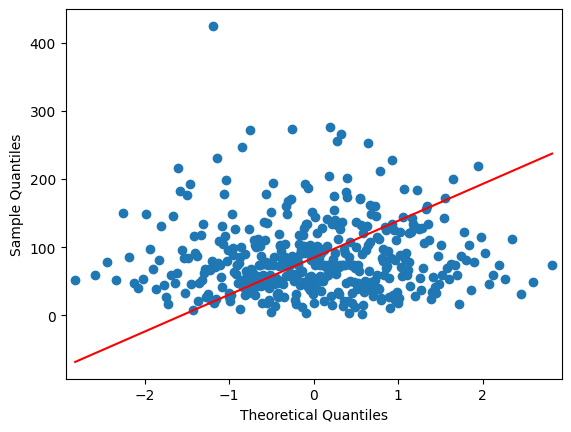

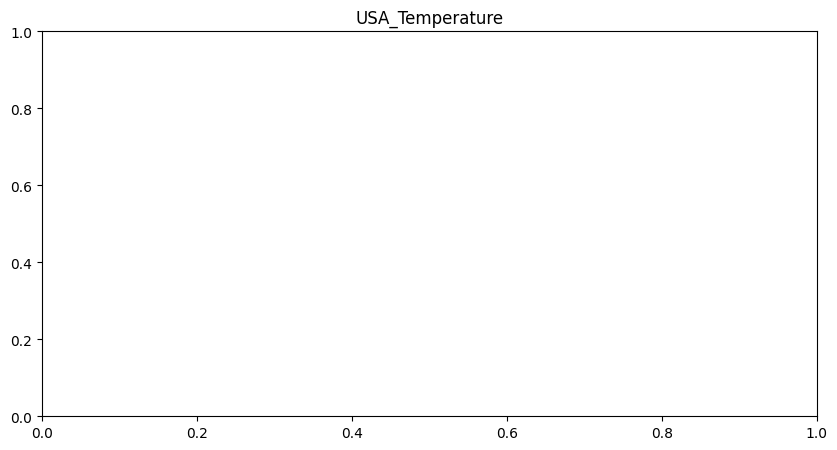

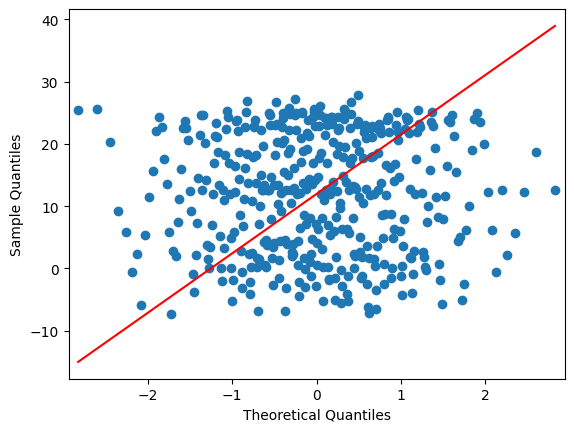

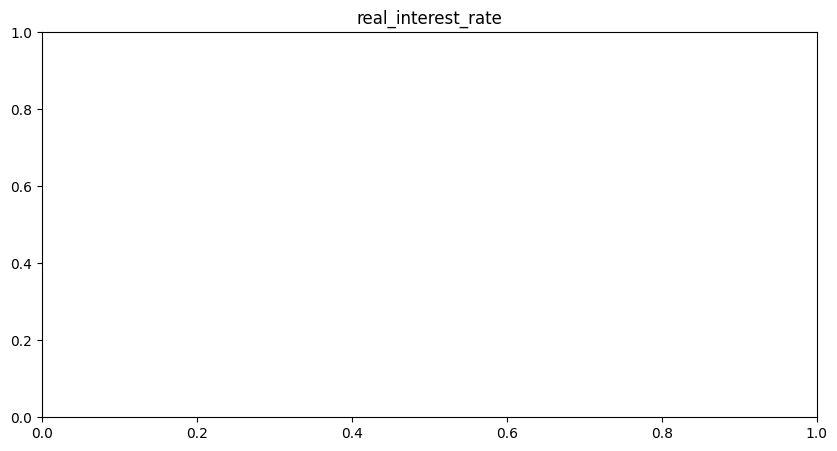

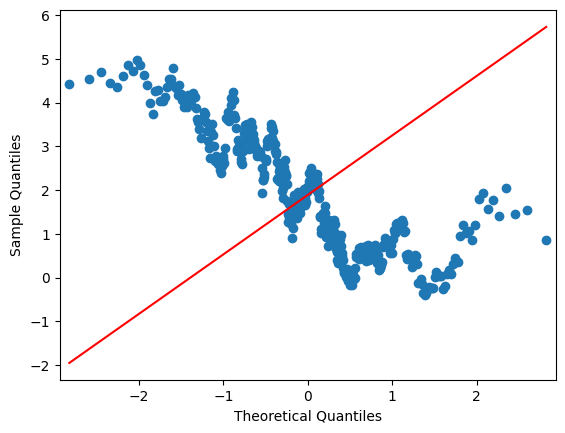

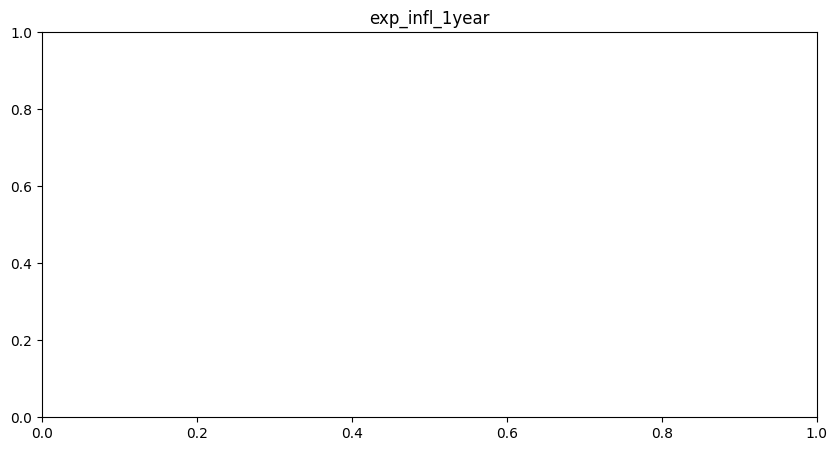

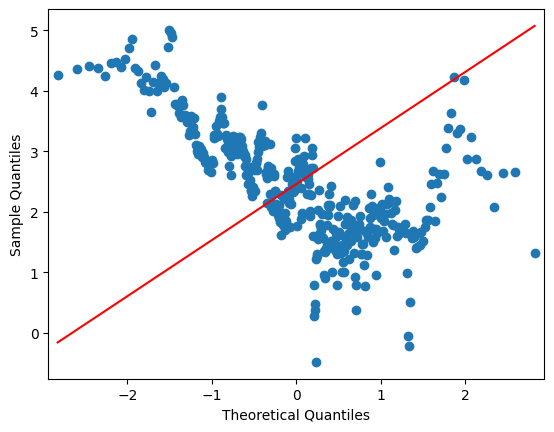

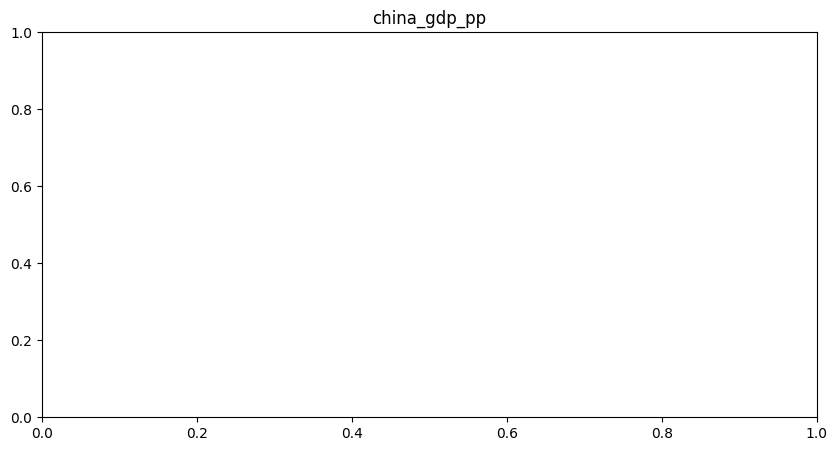

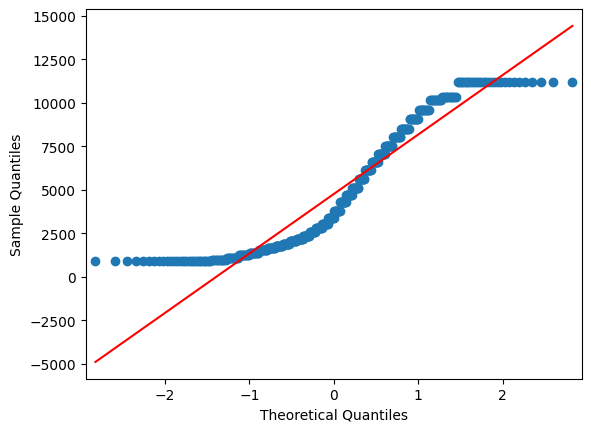

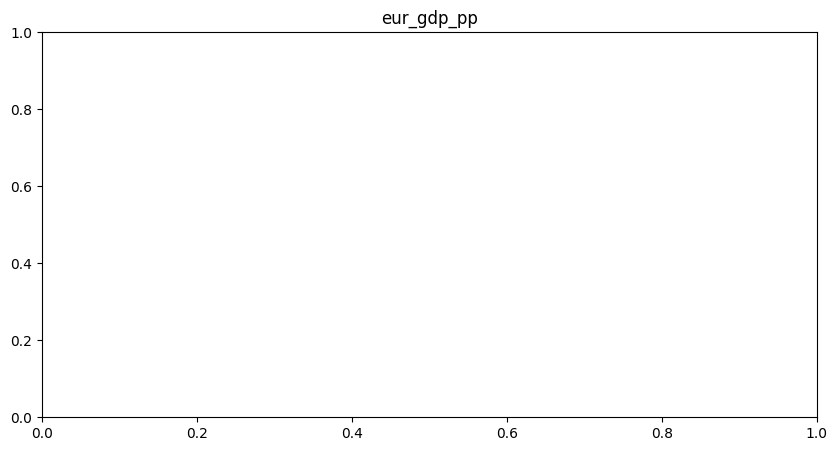

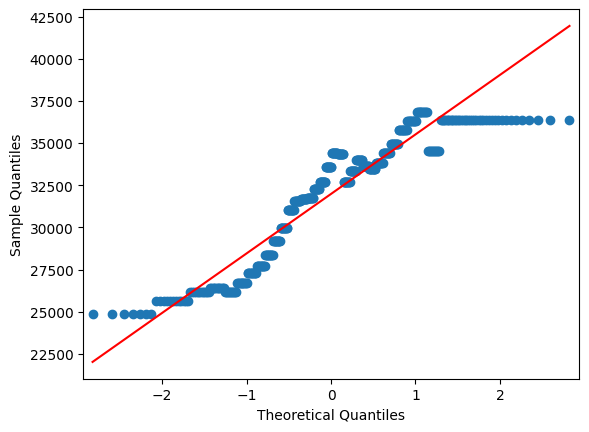

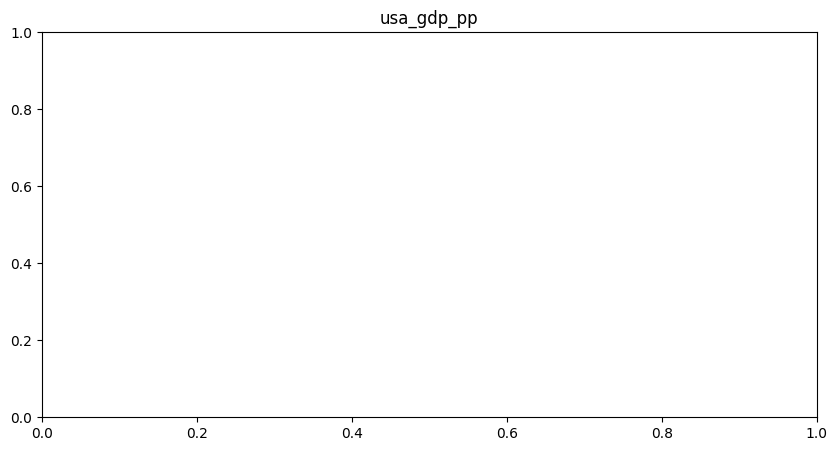

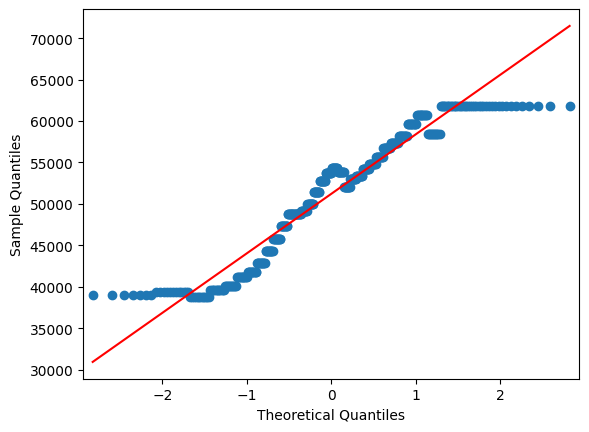

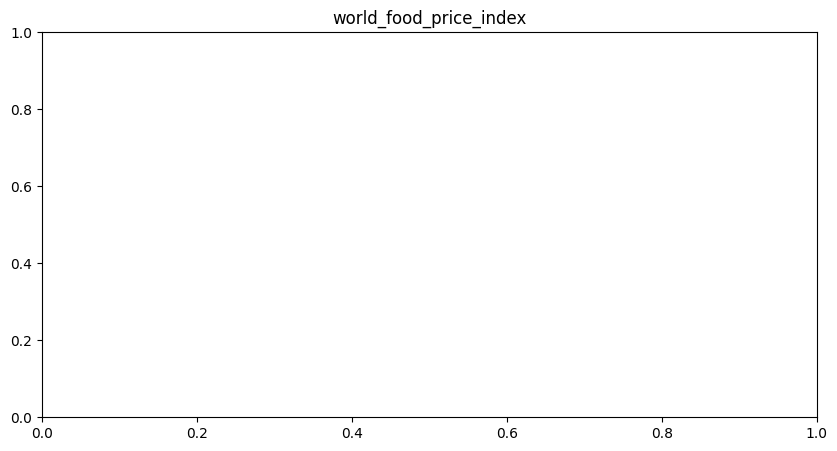

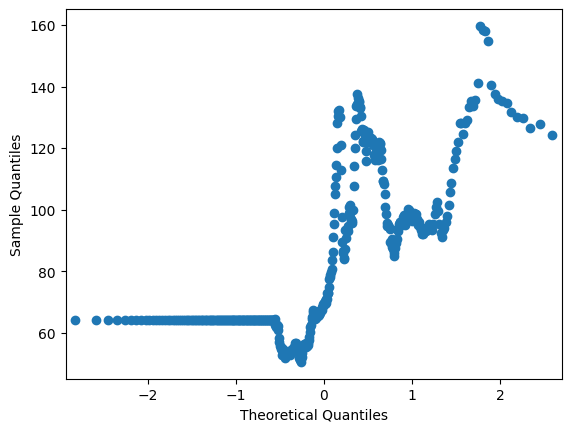

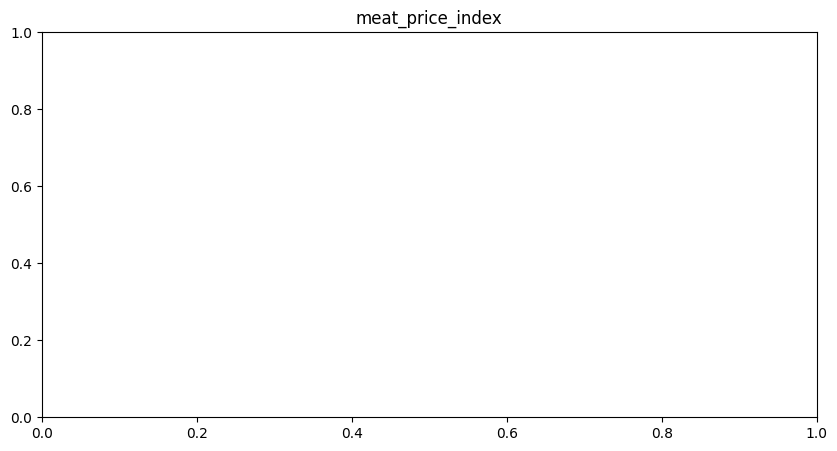

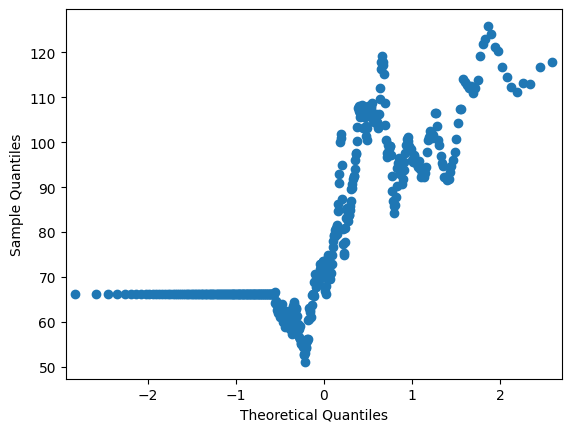

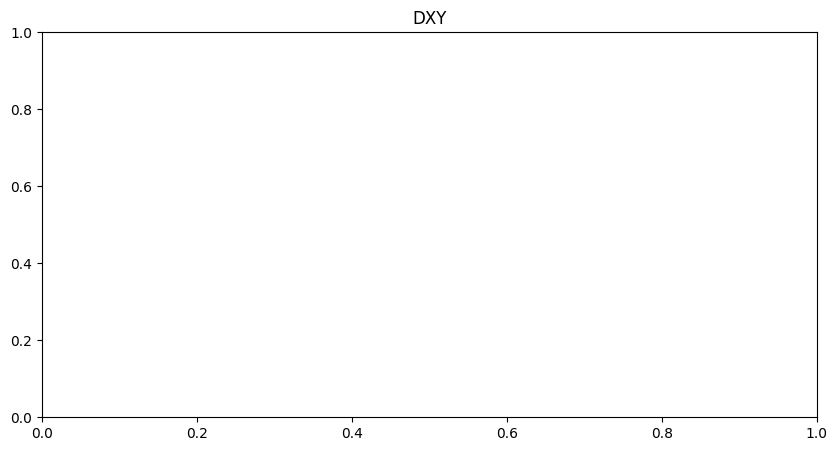

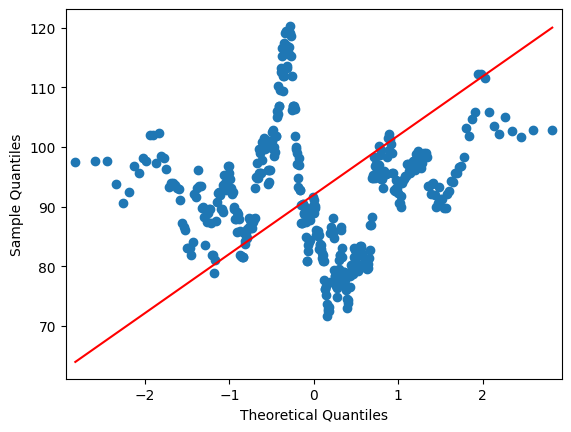

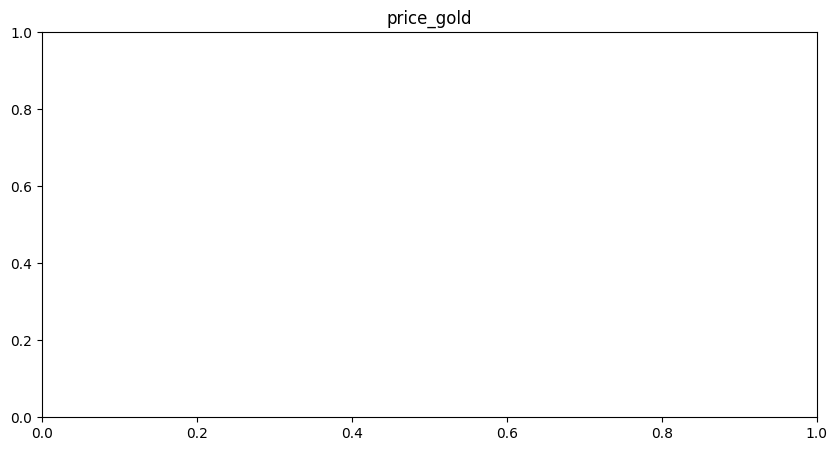

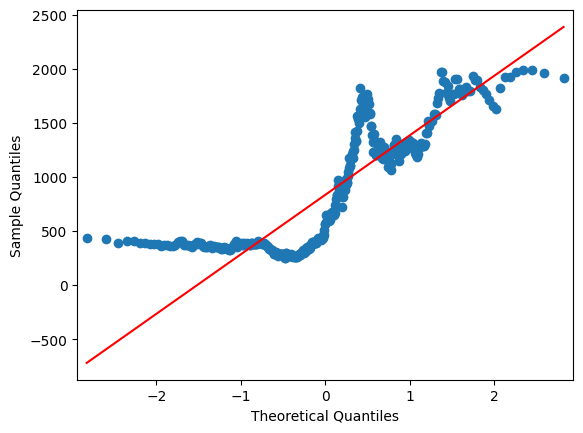

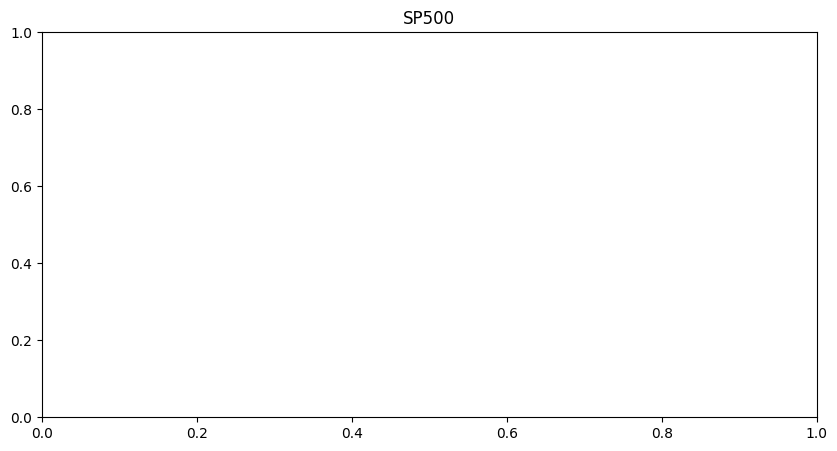

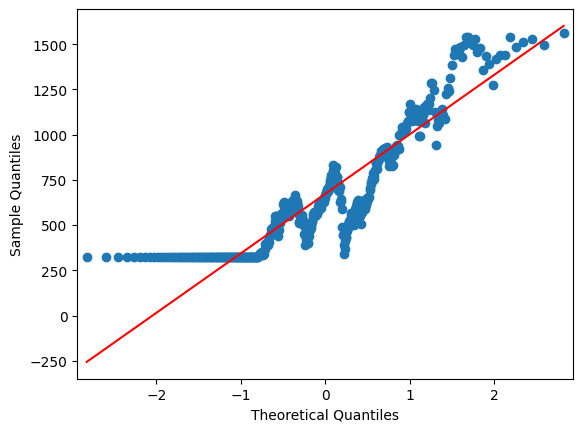

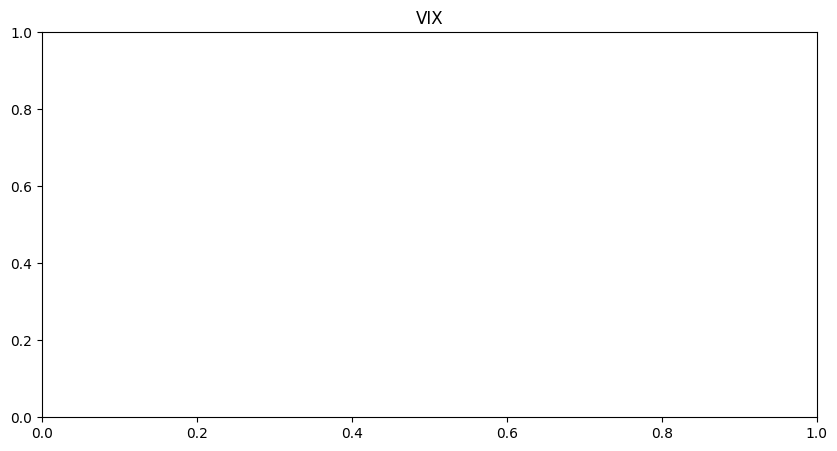

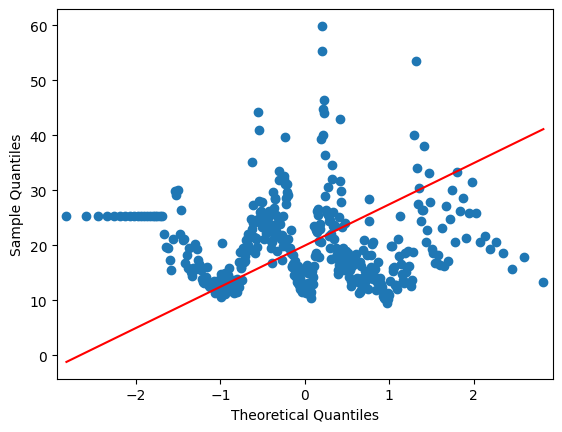

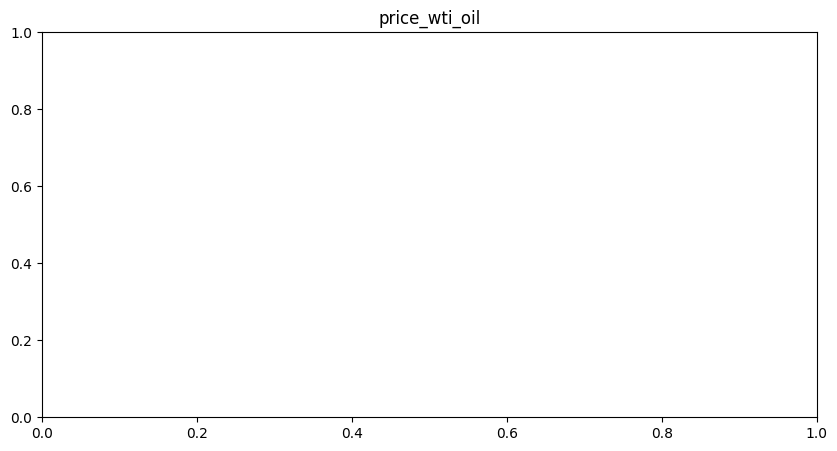

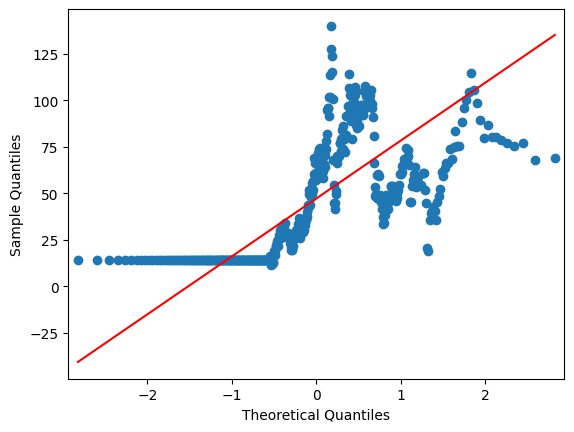

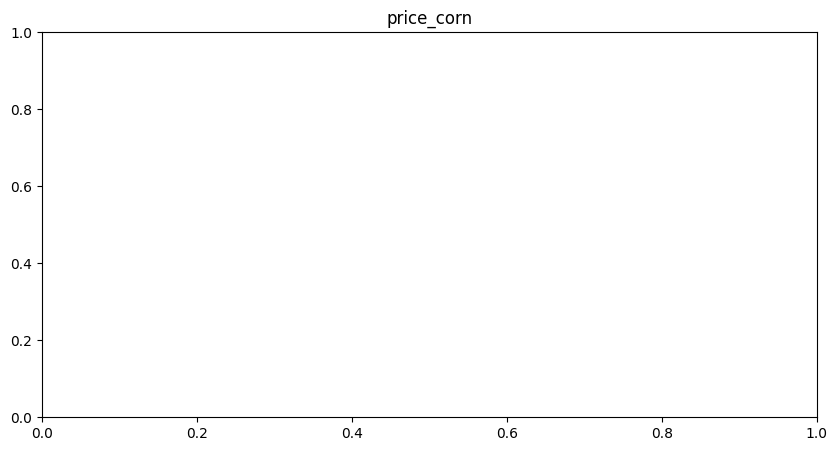

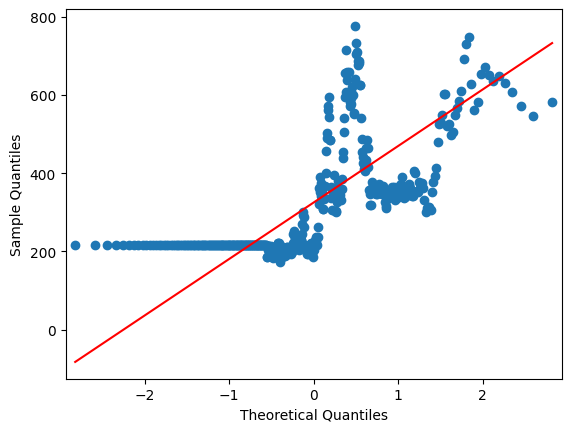

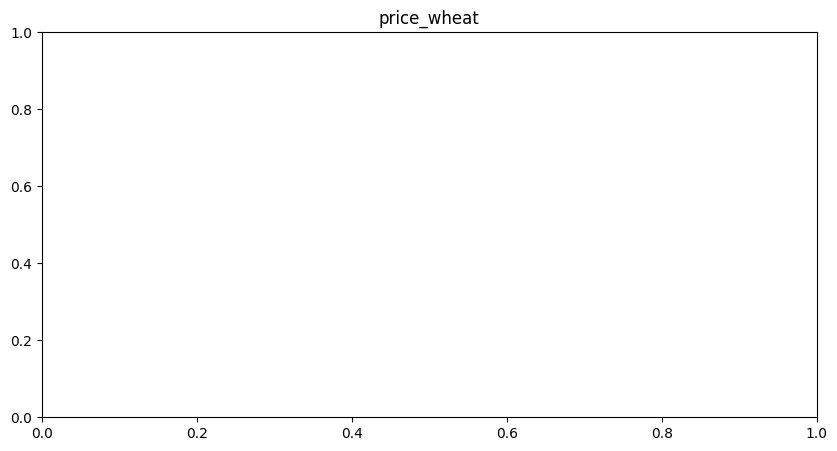

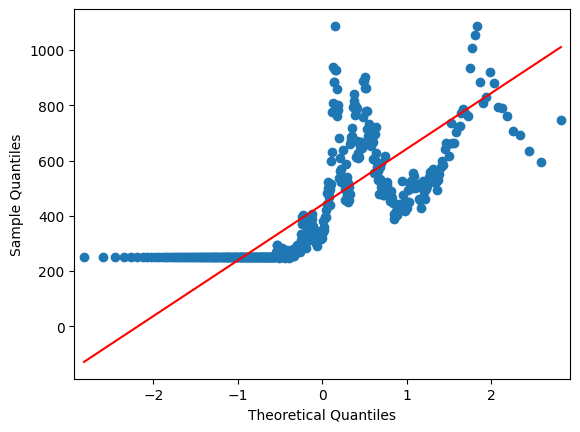

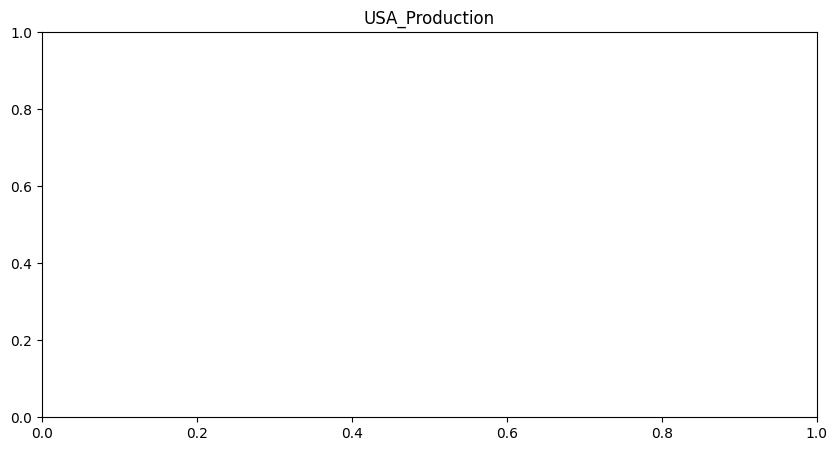

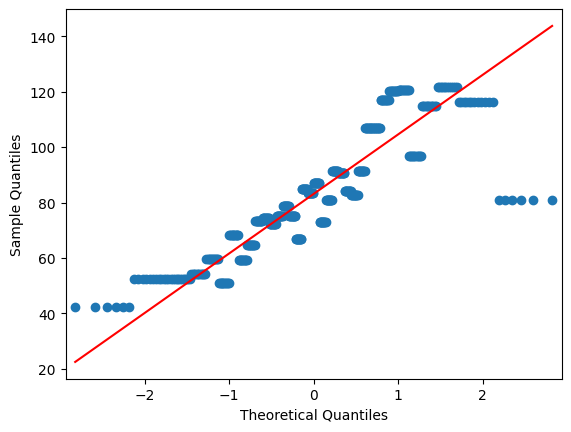

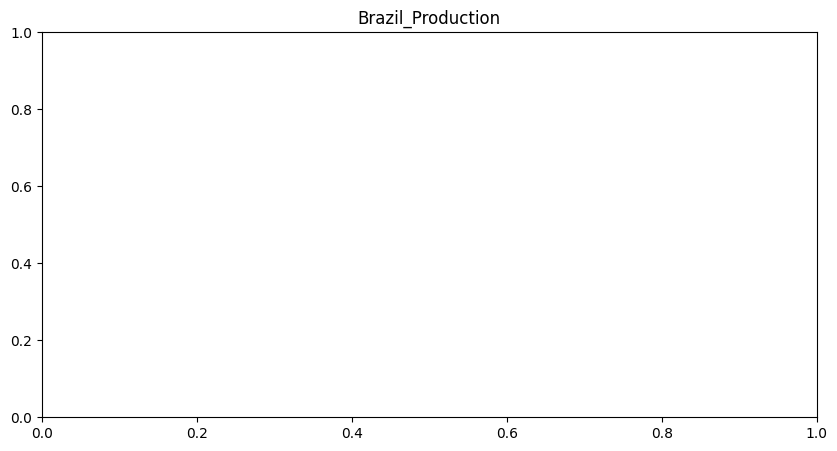

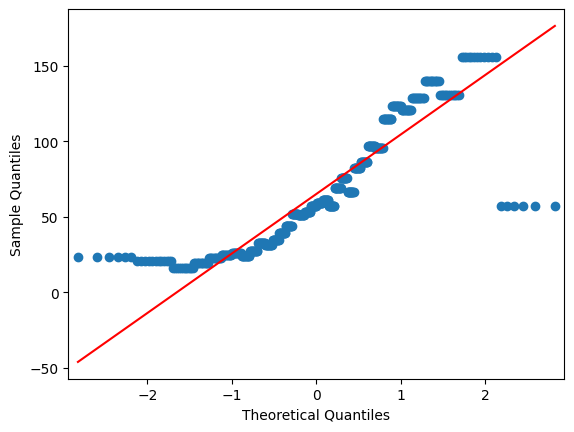

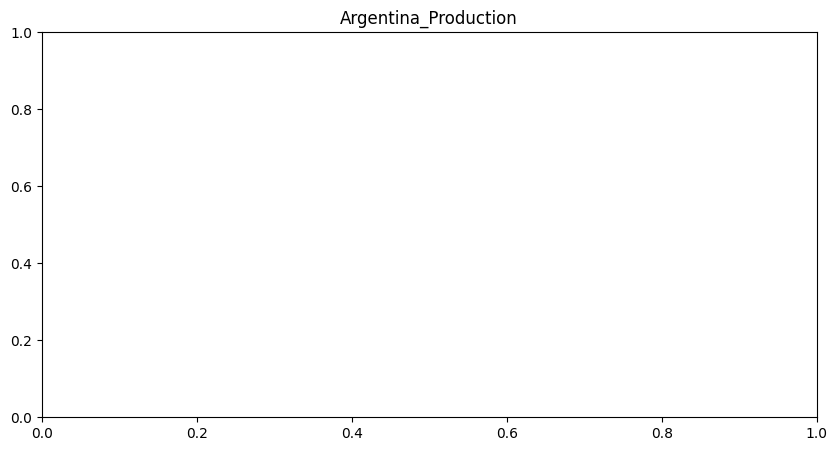

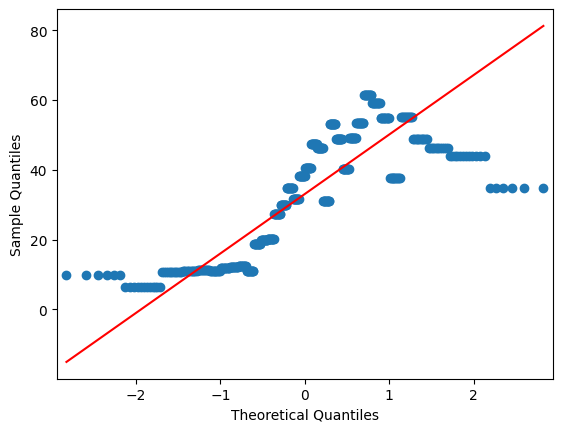

In [90]:
for i in df_copy_agricultural[numeric_features].columns:
    plt.figure(figsize=(10,5))
    plt.title(i)
    qqplot(df_copy_agricultural[[i]],line='s');

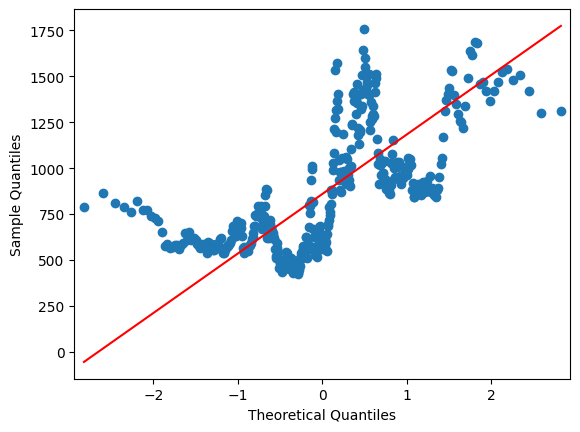

In [53]:
qqplot(df_copy_agricultural[["price_soybean"]],line='s');

<Axes: >

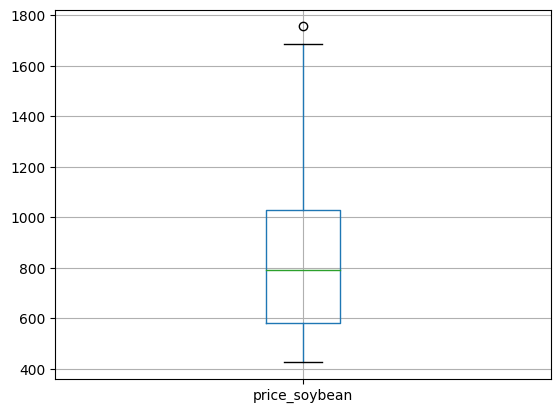

In [55]:
df_copy_agricultural[['price_soybean']].boxplot()

In [92]:
df_copy_agricultural[['meat_price_index', 'world_food_price_index', 'price_wheat', 'price_corn', 'price_wti_oil',
                     'price_gold', 'VIX', 'SP500', 'DXY', 'exp_infl_1year', 'real_interest_rate']].describe()

,meat_price_index,world_food_price_index,price_wheat,price_corn,price_wti_oil,price_gold,VIX,SP500,DXY,exp_infl_1year,real_interest_rate
count,419.000000,419.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,80.736993,84.436277,440.915476,325.235714,47.197976,835.558607,19.979071,672.419048,91.983757,2.458558,1.891121
std,18.827180,26.706328,202.044734,144.565548,31.187824,550.602320,7.501371,329.323746,9.932958,0.927958,1.362698
min,51.100000,50.500000,246.000000,174.000000,11.220000,255.500000,9.510000,326.200000,71.741000,-0.480680,-0.407130
25%,66.200000,64.200000,252.500000,217.250000,14.210000,362.825000,14.015000,390.375000,84.247500,1.754173,0.695505
50%,70.700000,69.400000,390.375000,240.500000,44.200000,568.500000,18.479995,594.700000,92.328500,2.401740,1.786485
75%,97.600000,99.950000,564.625000,369.687500,70.347500,1292.125000,24.537492,873.700000,97.695000,3.087290,2.971640
max,125.900000,159.700000,1087.500000,776.750000,140.000000,1989.620000,59.890000,1561.700000,120.280000,5.004300,4.973720


In [93]:
df_copy_agricultural[['usa_gdp_pp', 'eur_gdp_pp', 'china_gdp_pp', 'Argentina_Production', 'Brazil_Production', 
                      'USA_Production', 'Argentina_Precipitation', 'Brazil_Precipitation', 'USA_Precipitation', 
                      'Argentina_Temperature', 'Brazil_Temperature', 'USA_Temperature']].describe()

,usa_gdp_pp,eur_gdp_pp,china_gdp_pp,Argentina_Production,Brazil_Production,USA_Production,Argentina_Precipitation,Brazil_Precipitation,USA_Precipitation,Argentina_Temperature,Brazil_Temperature,USA_Temperature
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,51198.419905,31982.195786,4766.619143,33.082872,65.052571,83.114714,78.410000,131.083333,84.448348,16.050952,24.020833,11.962762
std,7189.265924,3532.601430,3426.846395,17.073359,39.445462,21.491352,38.297886,75.255525,54.211038,4.953679,1.744617,9.565229
min,38739.800000,24854.100000,883.760000,6.500000,15.750000,42.153000,0.000000,30.000000,2.286000,8.400000,21.050000,-7.390000
25%,45715.690000,29162.540000,1787.760000,12.448200,31.300000,68.444000,32.000000,73.000000,47.180500,11.725000,22.787500,3.485000
50%,52789.730000,32715.790000,3595.735000,34.785121,57.000000,80.749000,91.200000,121.500000,73.660000,16.000000,25.025000,12.530000
75%,56762.730000,34401.460000,7532.770000,48.796661,95.700000,96.667000,109.000000,186.000000,109.982000,21.275000,25.325000,21.390000
max,61855.520000,36847.880000,11188.300000,61.398276,156.000000,121.528000,315.900000,259.000000,424.688000,24.650000,25.700000,27.890000


## Scaling and feature selection

Robust Scaler technique for prices and climate features. MinMax Scaler technique for production??

In [95]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
df_copy_agricultural['meat_price_index'] = rb_scaler.fit_transform(df_copy_agricultural[['meat_price_index']])
df_copy_agricultural['world_food_price_index'] = rb_scaler.fit_transform(df_copy_agricultural[['world_food_price_index']])
df_copy_agricultural['price_wheat'] = rb_scaler.fit_transform(df_copy_agricultural[['price_wheat']])
df_copy_agricultural['price_corn'] = rb_scaler.fit_transform(df_copy_agricultural[['price_corn']])
df_copy_agricultural['price_wti_oil'] = rb_scaler.fit_transform(df_copy_agricultural[['price_wti_oil']])
df_copy_agricultural['price_gold'] = rb_scaler.fit_transform(df_copy_agricultural[['price_gold']])
df_copy_agricultural['VIX'] = rb_scaler.fit_transform(df_copy_agricultural[['VIX']])
df_copy_agricultural['SP500'] = rb_scaler.fit_transform(df_copy_agricultural[['SP500']])
df_copy_agricultural['DXY'] = rb_scaler.fit_transform(df_copy_agricultural[['DXY']])
df_copy_agricultural['exp_infl_1year'] = rb_scaler.fit_transform(df_copy_agricultural[['exp_infl_1year']])
df_copy_agricultural['real_interest_rate'] = rb_scaler.fit_transform(df_copy_agricultural[['real_interest_rate']])
df_copy_agricultural['usa_gdp_pp'] = rb_scaler.fit_transform(df_copy_agricultural[['usa_gdp_pp']])
df_copy_agricultural['eur_gdp_pp'] = rb_scaler.fit_transform(df_copy_agricultural[['eur_gdp_pp']])
df_copy_agricultural['china_gdp_pp'] = rb_scaler.fit_transform(df_copy_agricultural[['china_gdp_pp']])
df_copy_agricultural['Argentina_Precipitation'] = rb_scaler.fit_transform(df_copy_agricultural[['Argentina_Precipitation']])
df_copy_agricultural['Brazil_Precipitation'] = rb_scaler.fit_transform(df_copy_agricultural[['Brazil_Precipitation']])
df_copy_agricultural['USA_Precipitation'] = rb_scaler.fit_transform(df_copy_agricultural[['USA_Precipitation']])
df_copy_agricultural['Argentina_Temperature'] = rb_scaler.fit_transform(df_copy_agricultural[['Argentina_Temperature']])
df_copy_agricultural['Brazil_Temperature'] = rb_scaler.fit_transform(df_copy_agricultural[['Brazil_Temperature']])
df_copy_agricultural['USA_Temperature'] = rb_scaler.fit_transform(df_copy_agricultural[['USA_Temperature']])

df_copy_agricultural.head()

,date,year month,price_soybean,Brazil_Temperature,Brazil_Precipitation,Argentina_Temperature,Argentina_Precipitation,USA_Precipitation,USA_Temperature,real_interest_rate,...,DXY,price_gold,SP500,VIX,price_wti_oil,price_corn,price_wheat,USA_Production,Brazil_Production,Argentina_Production
0,7/1/1988,07-1988,787.50,-1.566502,-0.809735,-0.774869,-0.875325,-0.351871,0.718235,1.163756,...,0.386801,-0.142473,-0.555527,0.653838,-0.534224,-0.152522,-0.44173,42.153,23.6,9.9
1,8/1/1988,08-1988,867.50,-0.719212,-0.774336,-0.413613,-0.768831,-0.234580,0.733873,1.210937,...,0.398699,-0.149790,-0.555527,0.653838,-0.534224,-0.152522,-0.44173,42.153,23.6,9.9
2,9/1/1988,09-1988,813.00,-0.009852,-0.261062,-0.445026,-0.440260,0.068756,0.435633,1.283481,...,0.398699,-0.187345,-0.555527,0.653838,-0.534224,-0.152522,-0.44173,42.153,23.6,9.9
3,10/3/1988,10-1988,789.25,0.266010,0.261062,-0.073298,0.231169,-0.343782,-0.181514,1.175460,...,0.106451,-0.167653,-0.555527,0.653838,-0.534224,-0.152522,-0.44173,42.153,23.6,9.9
4,11/1/1988,11-1988,763.75,0.068966,0.455752,0.350785,0.141558,1.213347,-0.370846,1.130089,...,-0.133742,-0.170558,-0.555527,0.653838,-0.534224,-0.152522,-0.44173,42.153,23.6,9.9


In [96]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
df_copy_agricultural['Argentina_Production']= minmaxscaler.fit_transform(df_copy_agricultural[['Argentina_Production']])
df_copy_agricultural['Brazil_Production']= minmaxscaler.fit_transform(df_copy_agricultural[['Brazil_Production']])
df_copy_agricultural['USA_Production']= minmaxscaler.fit_transform(df_copy_agricultural[['USA_Production']])
df_copy_agricultural.head()

,date,year month,price_soybean,Brazil_Temperature,Brazil_Precipitation,Argentina_Temperature,Argentina_Precipitation,USA_Precipitation,USA_Temperature,real_interest_rate,...,DXY,price_gold,SP500,VIX,price_wti_oil,price_corn,price_wheat,USA_Production,Brazil_Production,Argentina_Production
0,7/1/1988,07-1988,787.50,-1.566502,-0.809735,-0.774869,-0.875325,-0.351871,0.718235,1.163756,...,0.386801,-0.142473,-0.555527,0.653838,-0.534224,-0.152522,-0.44173,0.0,0.055971,0.061933
1,8/1/1988,08-1988,867.50,-0.719212,-0.774336,-0.413613,-0.768831,-0.234580,0.733873,1.210937,...,0.398699,-0.149790,-0.555527,0.653838,-0.534224,-0.152522,-0.44173,0.0,0.055971,0.061933
2,9/1/1988,09-1988,813.00,-0.009852,-0.261062,-0.445026,-0.440260,0.068756,0.435633,1.283481,...,0.398699,-0.187345,-0.555527,0.653838,-0.534224,-0.152522,-0.44173,0.0,0.055971,0.061933
3,10/3/1988,10-1988,789.25,0.266010,0.261062,-0.073298,0.231169,-0.343782,-0.181514,1.175460,...,0.106451,-0.167653,-0.555527,0.653838,-0.534224,-0.152522,-0.44173,0.0,0.055971,0.061933
4,11/1/1988,11-1988,763.75,0.068966,0.455752,0.350785,0.141558,1.213347,-0.370846,1.130089,...,-0.133742,-0.170558,-0.555527,0.653838,-0.534224,-0.152522,-0.44173,0.0,0.055971,0.061933


## Correlation investigation

In [98]:
df_copy_agricultural.drop(columns=['date'], inplace=True)

In [100]:
df_copy_agricultural.drop(columns=['year month'], inplace=True)

<Axes: >

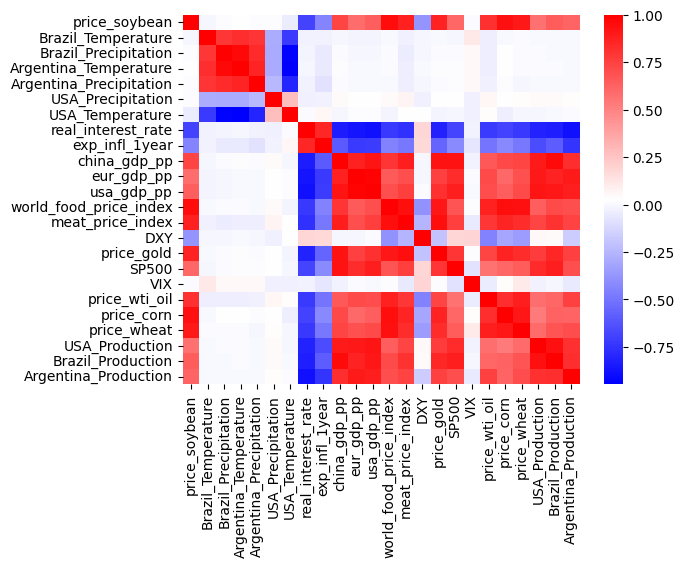

In [101]:
import seaborn as sns

corr = df_copy_agricultural.corr()

# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= 'bwr')

### Visualizing the correlation between column pairs

In [103]:
corr_df = corr.stack().reset_index() # Unstack correlation matrix 

corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df

,feature_1,feature_2,correlation
274,usa_gdp_pp,eur_gdp_pp,0.988036
251,eur_gdp_pp,usa_gdp_pp,0.988036
51,Brazil_Precipitation,Argentina_Temperature,0.969199
74,Argentina_Temperature,Brazil_Precipitation,0.969199
537,Brazil_Production,china_gdp_pp,0.955944
...,...,...,...
179,real_interest_rate,usa_gdp_pp,-0.885296
54,Brazil_Precipitation,USA_Temperature,-0.931837
146,USA_Temperature,Brazil_Precipitation,-0.931837
78,Argentina_Temperature,USA_Temperature,-0.947009


In [104]:
correlated_features = len(corr_df[(corr_df['correlation'] >= 0.9) | (corr_df['correlation'] <= -0.9)])

correlated_features

44

In [118]:
corr_df[(corr_df['correlation'] <= 0.9)]

,feature_1,feature_2,correlation
263,eur_gdp_pp,Argentina_Production,0.896156
562,Argentina_Production,eur_gdp_pp,0.896156
321,meat_price_index,china_gdp_pp,0.885343
229,china_gdp_pp,meat_price_index,0.885343
287,usa_gdp_pp,Argentina_Production,0.885077
...,...,...,...
179,real_interest_rate,usa_gdp_pp,-0.885296
54,Brazil_Precipitation,USA_Temperature,-0.931837
146,USA_Temperature,Brazil_Precipitation,-0.931837
78,Argentina_Temperature,USA_Temperature,-0.947009


In [119]:
corr_df[(corr_df['feature_1'] == 'price_soybean')]

,feature_1,feature_2,correlation
12,price_soybean,world_food_price_index,0.948900
19,price_soybean,price_corn,0.938997
20,price_soybean,price_wheat,0.903268
13,price_soybean,meat_price_index,0.874514
15,price_soybean,price_gold,0.866301
18,price_soybean,price_wti_oil,0.811772
9,price_soybean,china_gdp_pp,0.738696
22,price_soybean,Brazil_Production,0.649063
11,price_soybean,usa_gdp_pp,0.636864
23,price_soybean,Argentina_Production,0.616172


## Base Modelling

In [108]:
X = df_copy_agricultural.drop(columns=['price_soybean'])
y = df_copy_agricultural['price_soybean']

In [113]:
y

0       787.50
1       867.50
2       813.00
3       789.25
4       763.75
        ...   
415    1479.00
416    1505.50
417    1419.25
418    1299.75
419    1310.00
Name: price_soybean, Length: 420, dtype: float64

In [116]:
round(X.isnull().sum().sort_values(ascending=False)/len(data),2)

world_food_price_index     0.0
meat_price_index           0.0
Brazil_Production          0.0
USA_Production             0.0
price_wheat                0.0
price_corn                 0.0
price_wti_oil              0.0
VIX                        0.0
SP500                      0.0
price_gold                 0.0
DXY                        0.0
Brazil_Temperature         0.0
Brazil_Precipitation       0.0
usa_gdp_pp                 0.0
eur_gdp_pp                 0.0
china_gdp_pp               0.0
exp_infl_1year             0.0
real_interest_rate         0.0
USA_Temperature            0.0
USA_Precipitation          0.0
Argentina_Precipitation    0.0
Argentina_Temperature      0.0
Argentina_Production       0.0
dtype: float64

In [115]:
df_copy_agricultural['price_soybean'].describe()

count     420.000000
mean      859.872024
std       324.179595
min       425.000000
25%       582.125000
50%       791.250000
75%      1030.250000
max      1756.500000
Name: price_soybean, dtype: float64

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

base_model_score = scores.mean()

base_model_score

/home/caromezach/.pyenv/versions/3.10.6/envs/Agricultural_Market_Predictions/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/caromezach/.pyenv/versions/3.10.6/envs/Agricultural_Market_Predictions/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/home/caromezach/.pyenv/versions/3.10.6/envs/Agricultural_Market_Predictions/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/caromezach/.pyenv/versions/3.10.6/envs/Agricultural_Market_Predictions/lib/python3.10/site-packages/sklearn/base.py", line 722, in score
    y_pred = self.predict(X)
  File "/home/caromezach/.pyenv/versions/3.10.6/envs/Agricultural_Market_Predictions

nan

### Performing a feature permutation and ranking by order of importance

In [ ]:
import numpy as np
from sklearn.inspection import permutation_importance

model = LinearRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(model, X, y, n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance'] # Change column names

importance_df.sort_values(by="feature importance", ascending = False, inplace=True) # Order by importance
importance_df